<div style="background-color: #ffffff; color: #333; padding: 15px; border: 1px solid #ddd; border-radius: 8px;">
    <a class="anchor" id="1st-bullet"></a>
    <h2 style="color: #795548; font-weight: bold; text-align: center;">Group Project - Feature Selection</h2>
    <h3 style="color: #a1887f; text-align: center;">Data Mining 2024/2025</h3>
</div>

<div style="text-align: center;">
    <strong>Group 14</strong>
    <table style="margin: 0 auto; border-collapse: collapse; border: 1px solid black;">
        <tr>
            <th style="border: 1px solid white; padding: 8px;">Name</th>
            <th style="border: 1px solid white; padding: 8px;">Student ID</th>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Francisco Santos</td>
            <td style="border: 1px solid white; padding: 8px;">20240562</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Margarida Raposo</td>
            <td style="border: 1px solid white; padding: 8px;">20241020</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Nuno Nunes</td>
            <td style="border: 1px solid white; padding: 8px;">20240560</td>
        </tr>
        <tr>
            <td style="border: 1px solid white; padding: 8px;">Teresa Menezes</td>
            <td style="border: 1px solid white; padding: 8px;">20240333</td>
        </tr>
    </table>
</div>

### **Structure**
1. [Change](#add)
2. [Change](#add)

In [1]:
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from minisom import MiniSom

from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# To create hexagons
from matplotlib.patches import RegularPolygon

# Plotting
from matplotlib import cm # For colormap handling
import matplotlib.colors as mpl_colors
from matplotlib import colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable # For axe customization

# For cluster's visualization
from sklearn.manifold import TSNE
import umap 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df2.csv', index_col='customer_id')

In [3]:
df.head()

customer_age  vendor_count  product_count  is_chain  first_order  \
customer_id                                                                     
1b8f824d5e           18.0             2              5         1          0.0   
5d272b9dcb           17.0             2              2         2          0.0   
f6d1b2ba63           38.0             1              2         2          0.0   
180c632ed8           26.0             2              3         1          0.0   
4eb37a6705           20.0             2              5         0          0.0   

             last_order last_promo payment_method  CUI_American  CUI_Asian  \
customer_id                                                                  
1b8f824d5e            1   DELIVERY           DIGI          0.00       0.00   
5d272b9dcb            1   DISCOUNT           DIGI         12.82       6.39   
f6d1b2ba63            1   DISCOUNT           CASH          9.20       0.00   
180c632ed8            2   DELIVERY           DIGI          0.00      13.70   
4eb37a6705            2   NO PROMO           DIGI         14.57      40.87   

             ...  customer_lifecycle_stage  vendor_loyalty_score  \
customer_id  ...                                                   
1b8f824d5e   ...                    Active                   0.5   
5d272b9dcb   ...                    Active                   0.5   
f6d1b2ba63   ...                    Active                   1.0   
180c632ed8   ...                    Active                   0.5   
4eb37a6705   ...                    Active                   0.5   

             peak_order_day  peak_order_hour  cuisine_variety  \
customer_id                                                     
1b8f824d5e            DOW_0            HR_18                1   
5d272b9dcb            DOW_0            HR_10                2   
f6d1b2ba63            DOW_0             HR_9                1   
180c632ed8            DOW_1            HR_11                2   
4eb37a6705            DOW_1             HR_8                2   

             available_cuisines_city  relative_cuisine_variety  \
customer_id                                                      
1b8f824d5e                        15                  0.066667   
5d272b9dcb                         8                  0.250000   
f6d1b2ba63                        12                  0.083333   
180c632ed8                        12                  0.166667   
4eb37a6705                        12                  0.166667   

             average_spending  order_frequency  chain_consumption  
customer_id                                                        
1b8f824d5e             14.440              2.0                0.5  
5d272b9dcb              9.605              2.0                1.0  
f6d1b2ba63              4.600              2.0                1.0  
180c632ed8             15.780              1.0                0.5  
4eb37a6705             27.720              1.0                0.0  

[5 rows x 69 columns]

In [4]:
# select columns representing orders per hour (HR_0 to HR_23)
orders_per_hour = df.loc[:, 'HR_0':'HR_23']

# calculate the total number of orders for different times of the day
dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())  # Sum of orders from 12 AM to 6 AM
morning = sum(df.loc[:, 'HR_7':'HR_12'].sum())  # Sum of orders from 7 AM to 12 PM
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())  # Sum of orders from 1 PM to 6 PM
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())  # Sum of orders from 7 PM to 11 PM

# organize total orders for each time of the day in a list
orders_per_moment_of_day = [dawn, morning, afternoon, night]

# select columns representing orders per day of the week (DOW_0 to DOW_6)
orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']

# calculate the sum of orders for each day of the week
orders_per_dow_sum = orders_per_dow.sum()

# select columns representing the amount spent per cuisine type (CUI_American to CUI_Thai)
amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']

# calculate the sum of the amount spent for each cuisine type
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [5]:
df.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_amount_spent',
       'age_group', 'customer_city', 'total_orders', 'days_since_last_order',
       'customer_lifecycle_stage', 'vendor_loyalty_score', 'peak_order_day',
       'peak_order_hour', 'cuisine_variety', 'available_cuisines_city',
       'relative_cuisine_variety', 'average_s

# Correlation Matrix

In [6]:
categorical_features = ['last_promo', 'payment_method','age_group', 'customer_city', 
                        'customer_lifecycle_stage','peak_order_day','peak_order_hour','available_cuisines_city']

In [7]:
columns_to_drop = list(orders_per_hour.columns) + list(orders_per_dow.columns) + list(amount_spent_per_cuisine.columns) + categorical_features
df_corr = df.drop(columns_to_drop, axis=1)

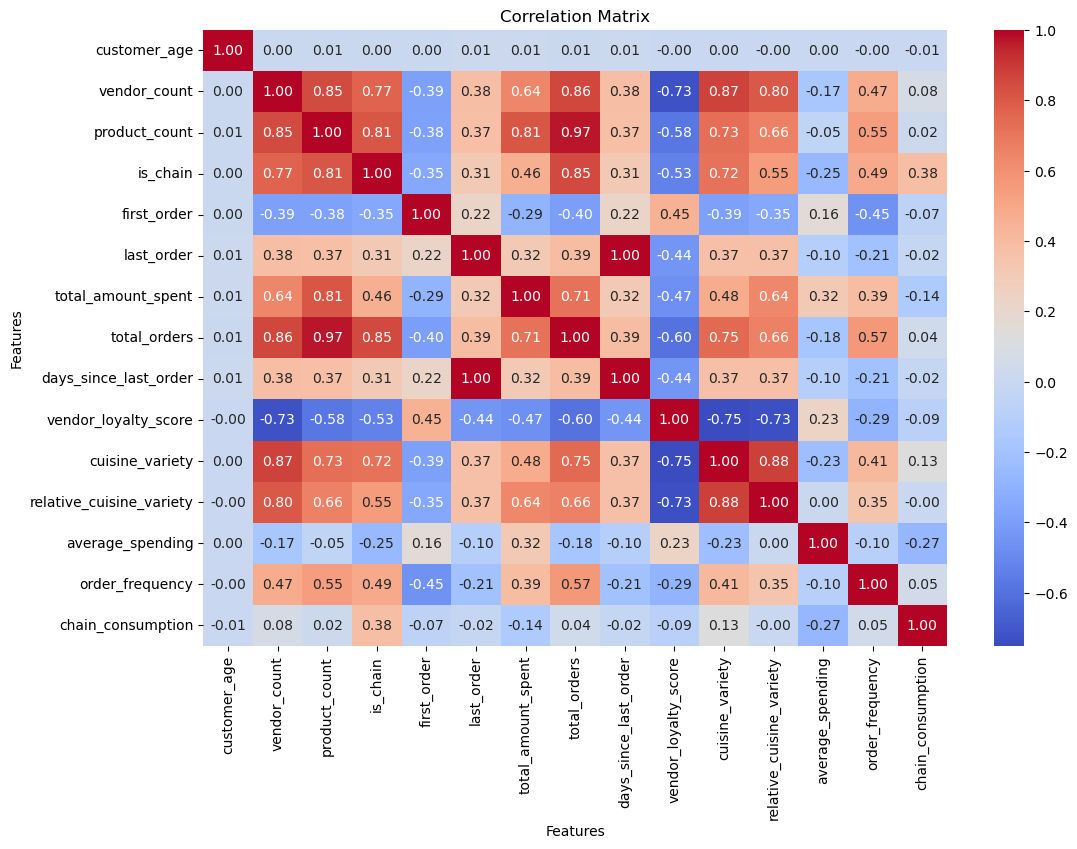

In [8]:
correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

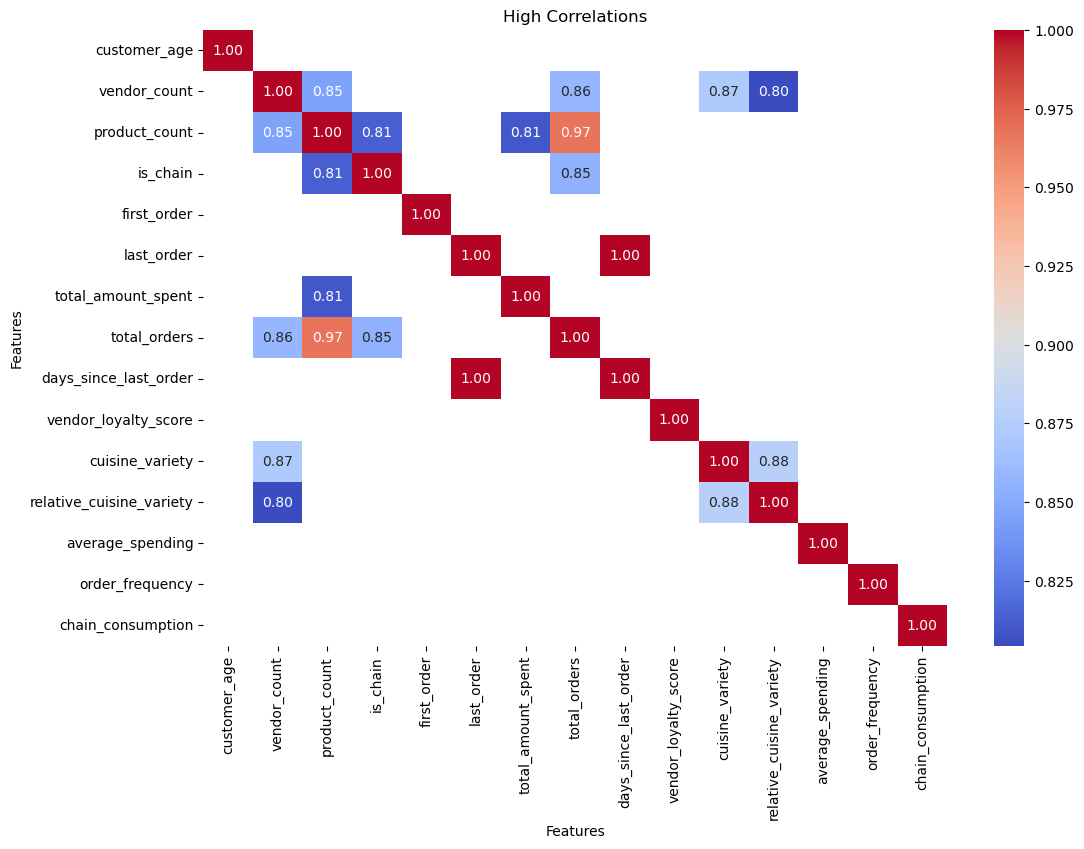

In [9]:
# Compute the correlation matrix
correlation_matrix = df_corr.corr()

# Filter the correlations above 0.8
high_corr_matrix = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with only high correlations
sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=high_corr_matrix.isna())

# Adding titles and labels
plt.title('High Correlations')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [10]:
df_corr.drop(['vendor_count', 'product_count', 'is_chain', 'last_order', 'cuisine_variety'], axis=1, inplace=True)

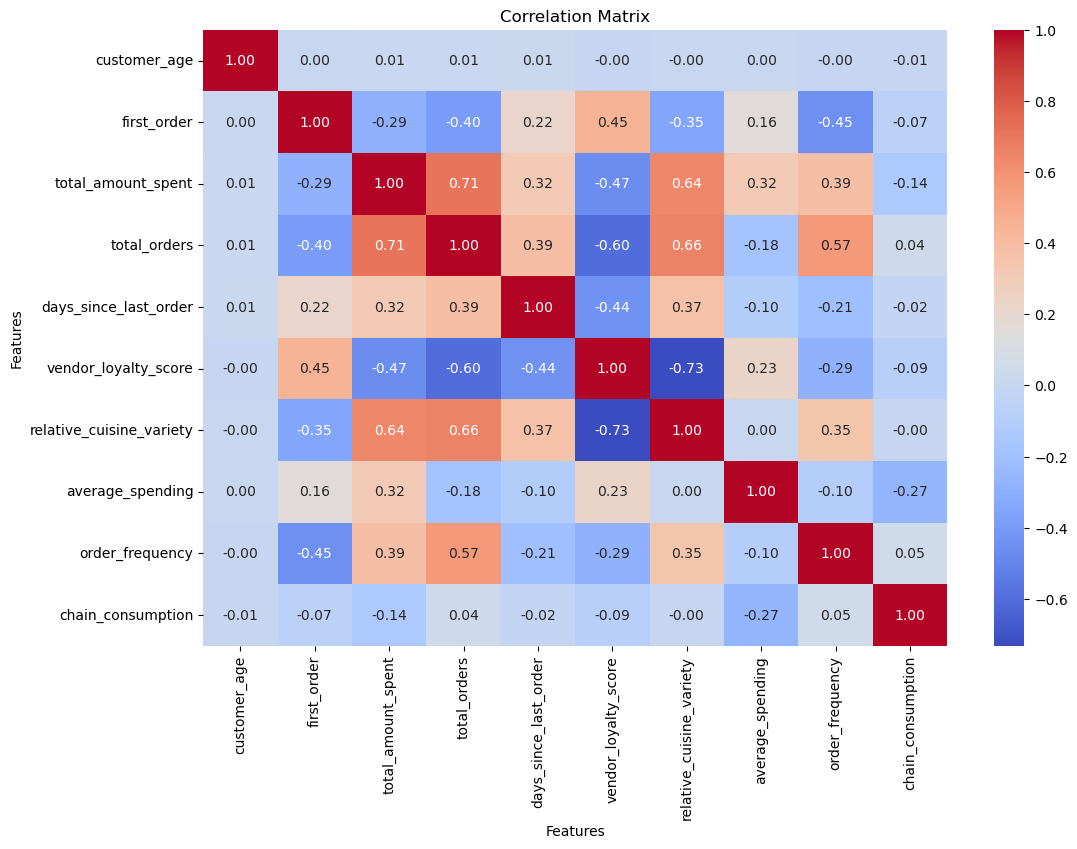

In [11]:
correlation_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adding titles and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()

In [12]:
df_corr.columns

Index(['customer_age', 'first_order', 'total_amount_spent', 'total_orders',
       'days_since_last_order', 'vendor_loyalty_score',
       'relative_cuisine_variety', 'average_spending', 'order_frequency',
       'chain_consumption'],
      dtype='object')

# Perspectives

**Preference-based** - vendor_loyalty_score, relative_cuisine_variety, chain_consumption

**Behavioral** - first_order, days_since_last_order, order_frequency, total_orders, total_amount_spent, average_spending

In [13]:
preferences = df[['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']]

behaviors = df[['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
                'total_amount_spent', 'average_spending']]

## Self-Organizing Maps (SOM)

### Preference-based Perspective

In [14]:
# Deciding the grid size for the SOM using a formula based on the number of rows in the dataset
grid_size = 5 * (preferences.shape[0] ** 0.5)

print(f'The product of M and N should be close to {round(grid_size,2)}')
print(f'Thus M and N should be close to {round(grid_size ** 0.5,2)}')

The product of M and N should be close to 887.54
Thus M and N should be close to 29.79


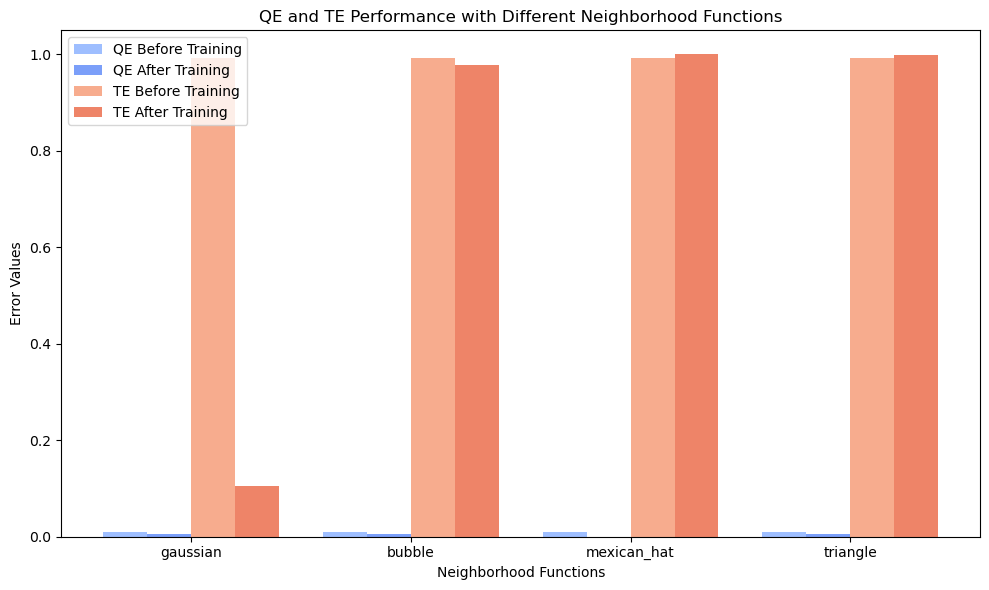

In [15]:
# Comparing the performance of different neighborhood functions
som_data = preferences.values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
M = 30
N = 30  
n_feats = len(preferences.columns) # Number of features used in the SOM

# List of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# Lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# Train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # Initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # Errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # Train the SOM
    sm.train_batch(preferences.values,
                   num_iteration=50000)
    
    # Errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # Store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot QE and TE for each neighborhood function
width = 0.2  # Width of the bars
x_pos = np.arange(len(neighborhood_functions))  # Position for each neighborhood function

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# Plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# Plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# Customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # Align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

In [16]:
# Actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(preferences.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # According to the previous plot, the gaussian function performed better
   topology = 'hexagonal', # Both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

sm.random_weights_init(preferences.values)
initial_qe = sm.quantization_error(preferences.values)
initial_te = sm.topographic_error(preferences.values)

sm.train(preferences.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(preferences.values)
final_te = sm.topographic_error(preferences.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [0.0097 0.0041]
Intital topographic error vs After training [0.9936 0.0525]


In [17]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 3)

In [18]:
def plot_hexagons(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     

    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            wx, wy = som.convert_map_to_euclidean((i,j)) 

            hex = RegularPolygon((wx, wy), 
                                numVertices=6, 
                                radius= np.sqrt(1/3),
                                facecolor=cmap(colornorm(matrix_vals[i, j])), 
                                alpha=1, 
                                edgecolor='white',
                                linewidth=.5)
            axs.add_patch(hex)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx,wy, annot_val, 
                        ha='center', va='center', 
                        fontsize='small')


    ## Remove axes for hex plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf 

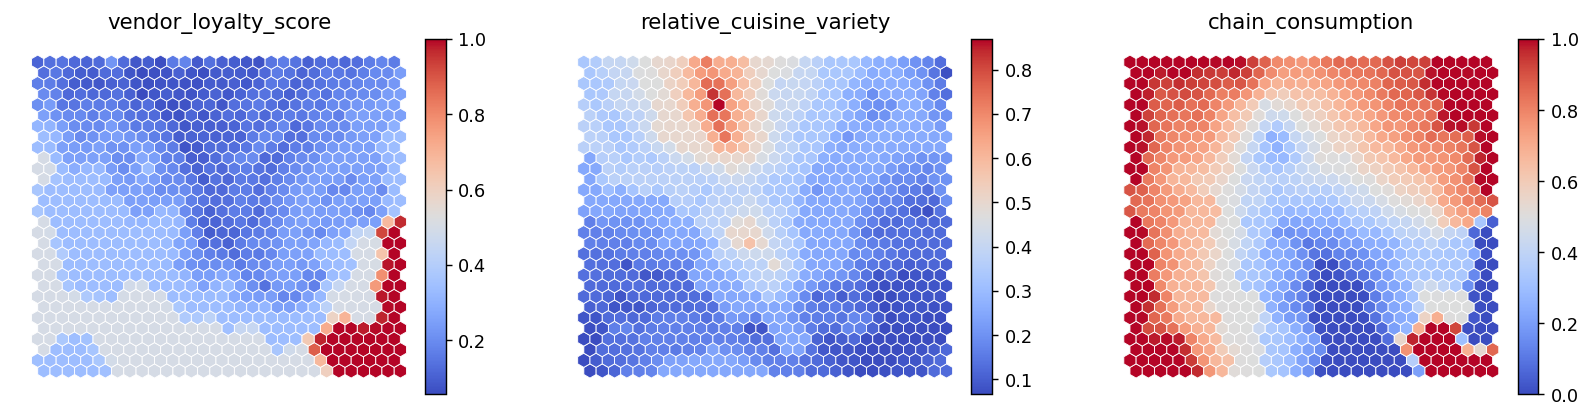

In [19]:
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(1, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(preferences.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))
    # colornorm = mpl_colors.CenteredNorm(vcenter=0, halfrange=vext)

    sf = plot_hexagons(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=preferences.columns[cpi],
        cmap=cm.coolwarm)

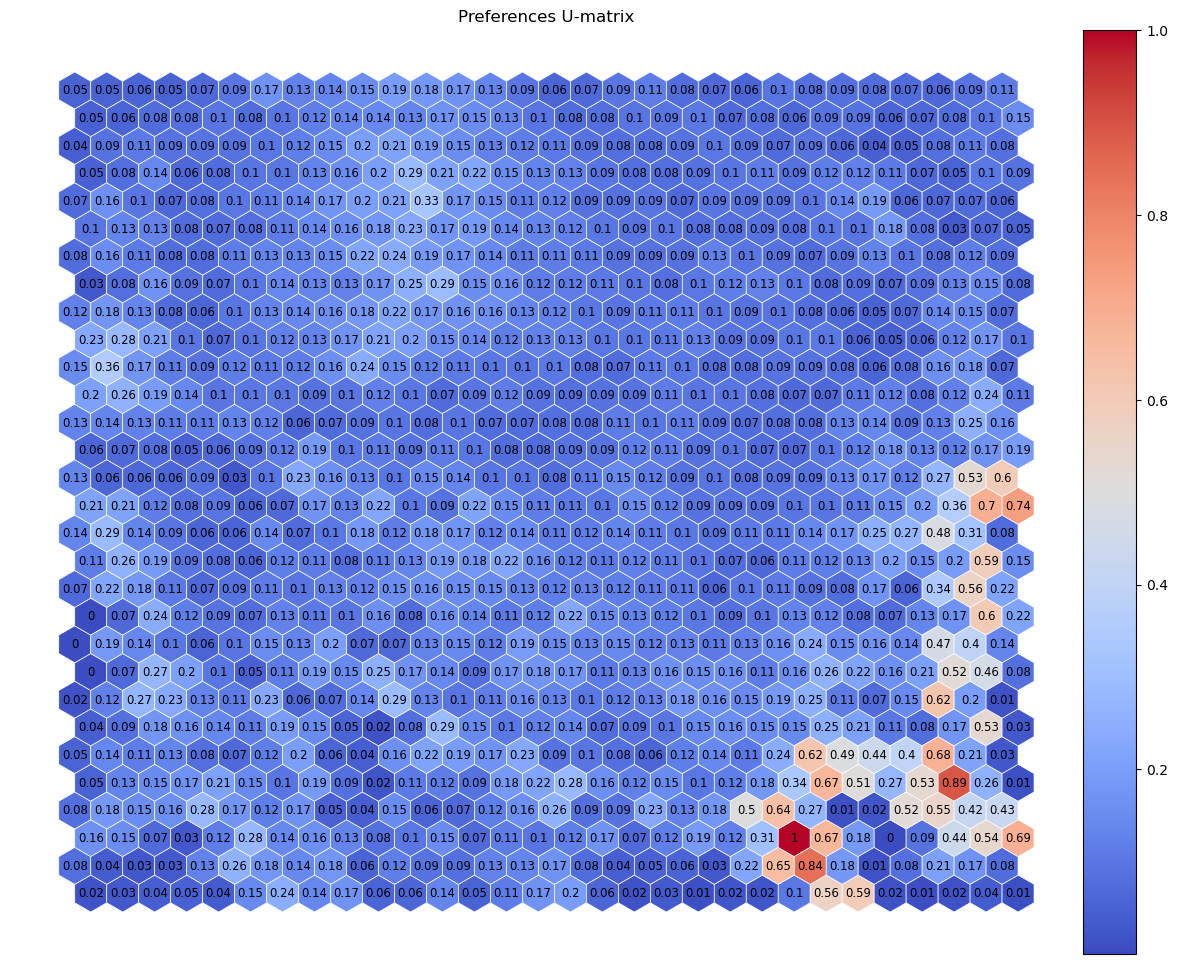

In [20]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Preferences U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

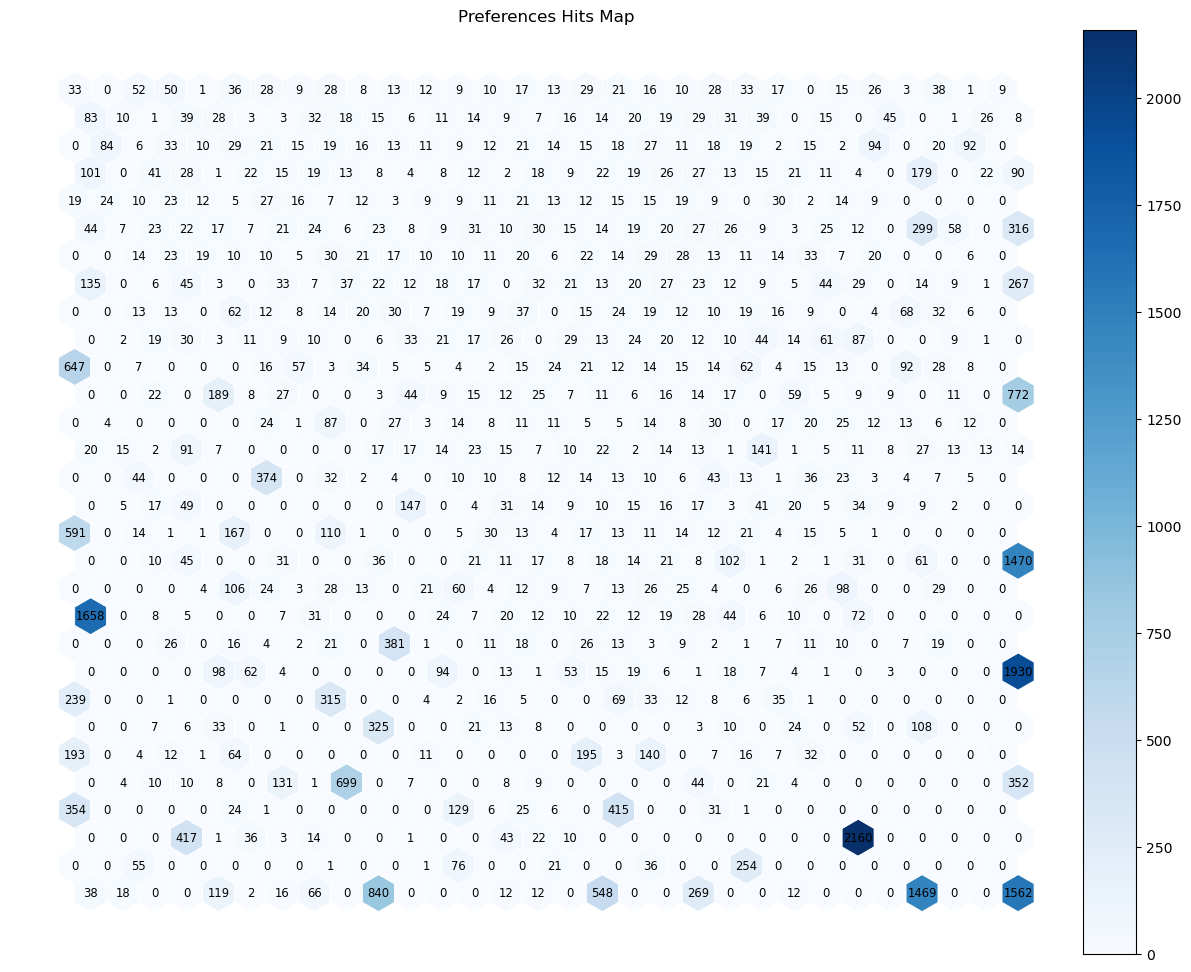

In [21]:
hitsmatrix = sm.activation_response(preferences.values)


fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Preferences Hits Map",
                    cmap=cm.Blues,
                    annot=True)

In [22]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(preferences)
    inertia.append(kmclust.inertia_)

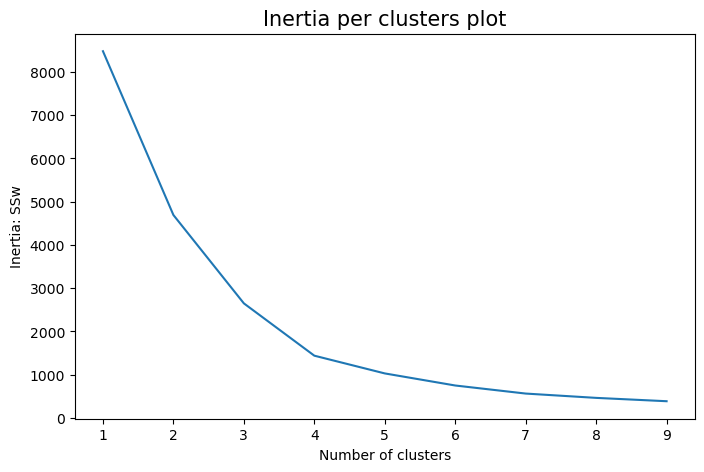

In [23]:
# Plotting inertia

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [24]:
weights_flat = sm.get_weights().reshape((M*N),len(preferences.columns))
weights_flat.shape

(900, 3)

In [25]:
# Perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(weights_flat)

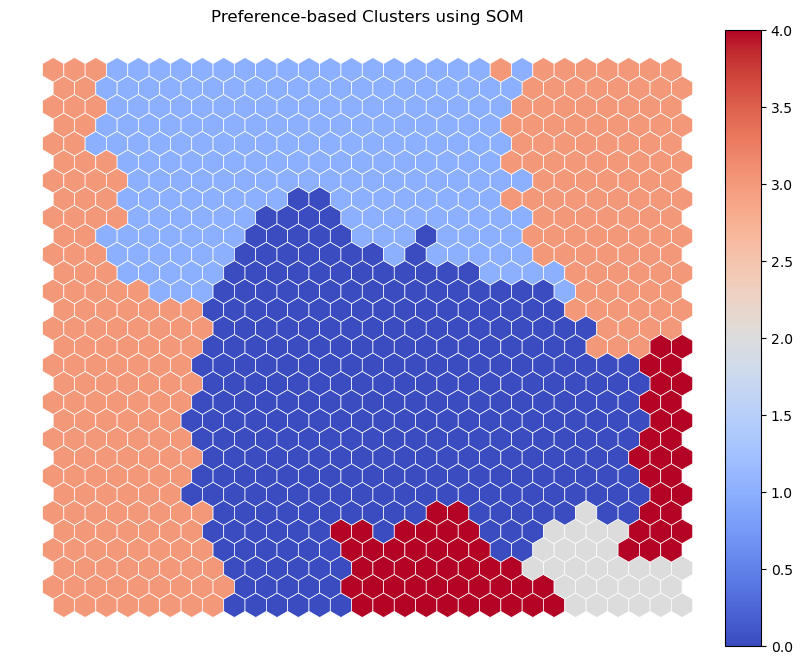

In [26]:
kmeans_matrix = kmeans_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_hexagons(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Preference-based Clusters using SOM",
                    cmap=cm.coolwarm)

In [27]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index
som_preferences_score = silhouette_score(weights_flat, kmeans_labels, metric='euclidean')
# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_preferences_score,3)}') 

som_preferences_index = davies_bouldin_score(weights_flat, kmeans_labels)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_preferences_index,3)}')

Silhouette Score: 0.328
Davies-Bouldin Index: 0.94


In [28]:
# Check the nodes and and respective clusters
nodes = weights_flat

df_nodes = pd.DataFrame(nodes, columns=preferences.columns)
df_nodes['som_cluster'] = kmeans_labels
df_nodes

vendor_loyalty_score  relative_cuisine_variety  chain_consumption  \
0                0.333333                  0.067278           1.000000   
1                0.342288                  0.067150           0.999324   
2                0.499933                  0.066681           1.000000   
3                0.500000                  0.066667           1.000000   
4                0.500000                  0.072929           0.999419   
..                    ...                       ...                ...   
895              0.250000                  0.183606           1.000000   
896              0.249999                  0.131571           1.000000   
897              0.228435                  0.155040           0.999999   
898              0.244515                  0.073993           0.999916   
899              0.160555                  0.130441           0.996384   

     som_cluster  
0              3  
1              3  
2              3  
3              3  
4              3  
..           ...  
895            3  
896            3  
897            3  
898            3  
899            3  

[900 rows x 4 columns]

In [29]:
# Getting BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in preferences.values])

print(bmu_index.shape)

bmu_index

(31509, 2)


array([[24,  6],
       [ 0, 19],
       [26,  0],
       ...,
       [29,  8],
       [26,  0],
       [24,  2]])

In [30]:
som_final_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [31]:
preferences_columns = preferences.columns.tolist()

df_preferences = preferences.copy()
df_preferences['som_cluster'] = som_final_labels

df_preferences.head()

vendor_loyalty_score  relative_cuisine_variety  \
customer_id                                                   
1b8f824d5e                    0.5                  0.066667   
5d272b9dcb                    0.5                  0.250000   
f6d1b2ba63                    1.0                  0.083333   
180c632ed8                    0.5                  0.166667   
4eb37a6705                    0.5                  0.166667   

             chain_consumption  som_cluster  
customer_id                                  
1b8f824d5e                 0.5            0  
5d272b9dcb                 1.0            3  
f6d1b2ba63                 1.0            2  
180c632ed8                 0.5            0  
4eb37a6705                 0.0            4

In [32]:
# Characterizing the final clusters
df_preferences[preferences_columns + ['som_cluster']].groupby('som_cluster').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption
som_cluster                                                                   
0                        0.349521                  0.247436           0.367711
1                        0.156069                  0.424573           0.718704
2                        1.000000                  0.088936           1.000000
3                        0.366860                  0.195177           0.926012
4                        0.827782                  0.119677           0.003957

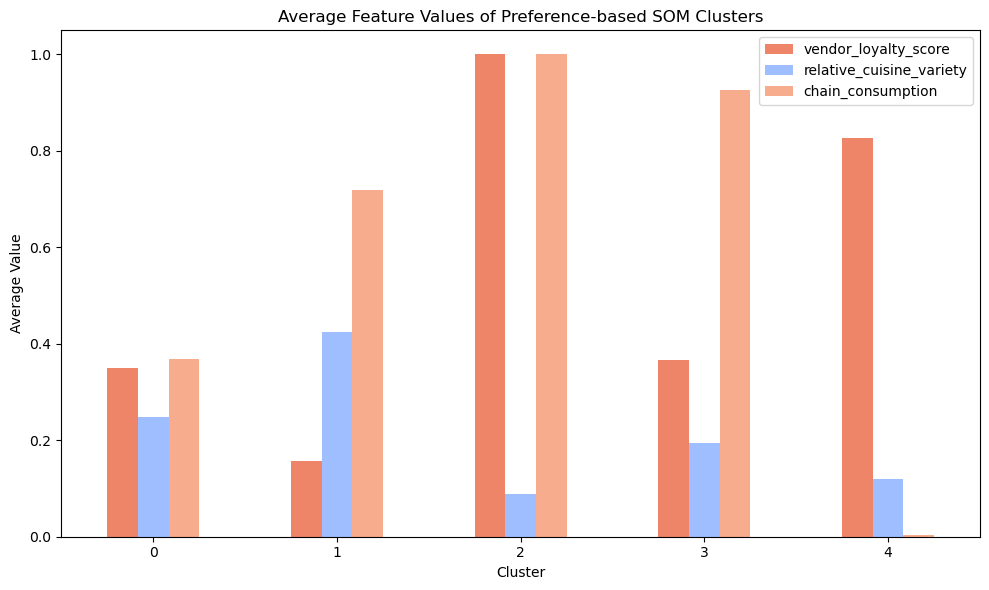

In [33]:
# Assuming 'df_preferences' already has the 'som_clusters' column and the features to plot
features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']

# Group by 'som_clusters' and compute the mean
cluster_means = df_preferences[features + ['som_cluster']].groupby('som_cluster').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
vendor_loyalty_score_color = cmap(0.8)
relative_cuisine_variety_color = cmap(0.3)
chain_consumption_color = cmap(0.7)

colors = [vendor_loyalty_score_color, relative_cuisine_variety_color, chain_consumption_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Preference-based SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [34]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_preferences)  # get total sum of squares
ssw_labels = df_preferences[preferences_columns + ['som_cluster']].groupby('som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.983

### Cluster visualization using U-Map

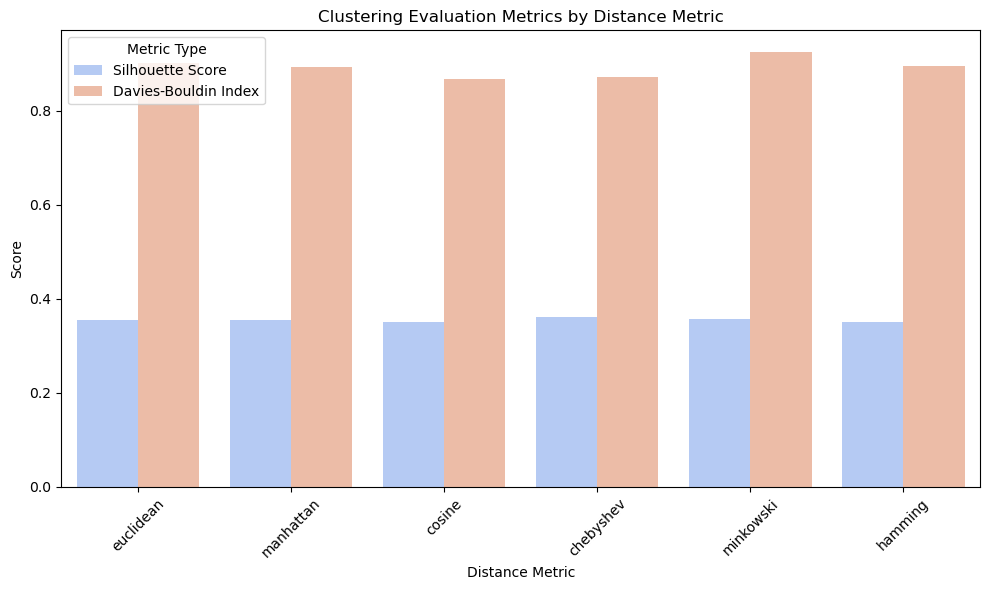

In [35]:
import umap

distance_metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'minkowski', 'hamming']

# Initialize lists to store results
silhouette_scores = []
db_scores = []

# Loop through each distance metric
for metric in distance_metrics:
    # Apply UMAP with the current metric
    reducer = umap.UMAP(n_neighbors=5, n_components=2, metric=metric)
    embedding = reducer.fit_transform(df_preferences[preferences_columns])

    # Perform clustering
    kmeans = KMeans(n_clusters=5, random_state=42).fit(embedding)
    cluster_labels = kmeans.labels_

    # Evaluate clustering
    silhouette = silhouette_score(embedding, cluster_labels)
    db_index = davies_bouldin_score(embedding, cluster_labels)

    silhouette_scores.append(silhouette)
    db_scores.append(db_index)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': distance_metrics,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': db_scores
})

# Reshape data for plotting
results_melted = results_df.melt(id_vars='Metric', value_vars=['Silhouette Score', 'Davies-Bouldin Index'], 
                                 var_name='Metric Type', value_name='Score')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Metric Type', data=results_melted, palette='coolwarm')

# Adjusting plot aesthetics
plt.title('Clustering Evaluation Metrics by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine')
embedding = reducer.fit_transform(df_preferences[preferences_columns], y=df_preferences['som_cluster']) 
embedding

array([[ 12.502092 ,  -4.279379 ],
       [  2.851557 ,   1.3663521],
       [  8.117086 , -11.406938 ],
       ...,
       [ 16.520805 ,  -5.497628 ],
       [  4.8261533,  -7.7305274],
       [  7.5870624, -10.614404 ]], dtype=float32)

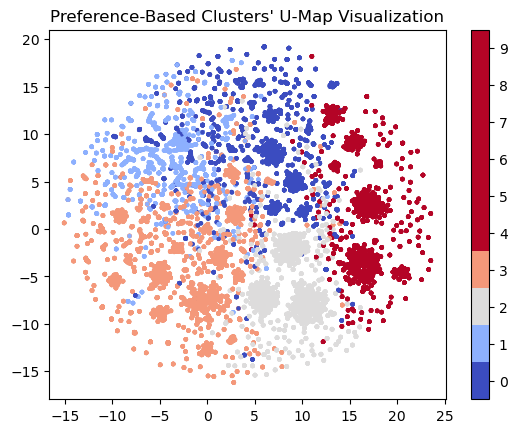

In [37]:
plt.scatter(embedding[:, 0], embedding[:, 1], c= df_preferences['som_cluster'], cmap='coolwarm', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Preference-Based Clusters' U-Map Visualization")
plt.show()

In [38]:
silhouette_avg = silhouette_score(embedding, df_preferences['som_cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(embedding, df_preferences['som_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.20
Davies-Bouldin Index: 1.09


### Cluster visualization using t-SNE

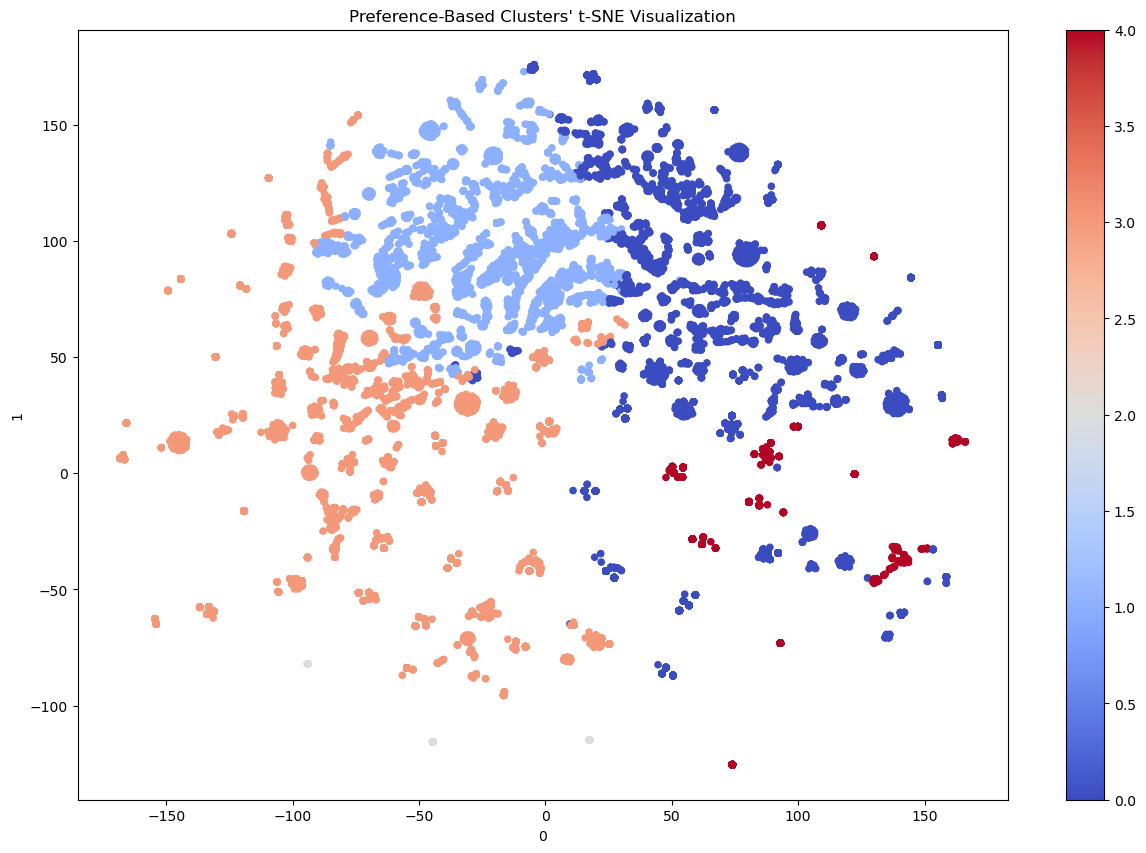

In [39]:
# This is step can be quite time consuming - don't forget to only use metric features
two_dim = TSNE(random_state=42).fit_transform(df_preferences[preferences_columns])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_preferences['som_cluster'], colormap='coolwarm', figsize=(15,10))
plt.title("Preference-Based Clusters' t-SNE Visualization")
plt.show()

### Behavioral Perspective

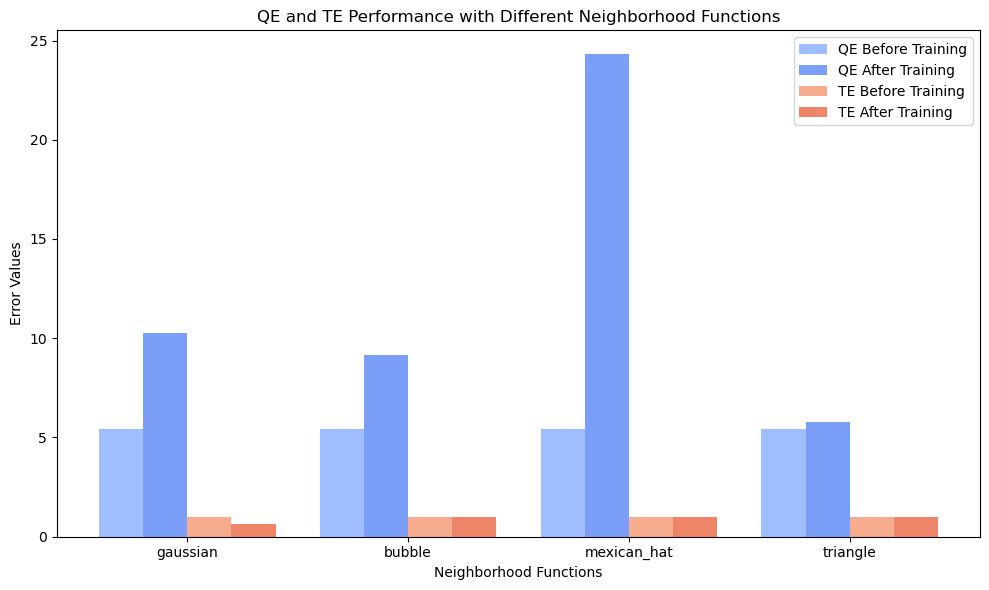

In [40]:
# Comparing the performance of different neighborhood functions
som_data = behaviors.values

sigma = 1
learning_rate = 0.9 # the learning rate value was chosen by experimenting and comparing QE and TE values
M = 30
N = 30  
n_feats = len(behaviors.columns) # Number of features used in the SOM

# List of neighborhood functions to test
neighborhood_functions = ['gaussian', 'bubble', 'mexican_hat', 'triangle']

# Lists to store QE and TE values for each neighborhood function
qe_values = []
te_values = []

# Train the SOM with each neighborhood function
for func in neighborhood_functions:
    sm = MiniSom(M, N, n_feats,
                 sigma=sigma, 
                 neighborhood_function=func, 
                 learning_rate=learning_rate, 
                 topology='hexagonal', 
                 random_seed=42)
    
    # Initialize the weights of the SOM picking random samples from data
    sm.random_weights_init(som_data)
    
    # Errors before training
    qe_before = sm.quantization_error(som_data)
    te_before = sm.topographic_error(som_data)
    
    # Train the SOM
    sm.train_batch(behaviors.values,
                   num_iteration=50000)
    
    # Errors after training
    qe_after = sm.quantization_error(som_data)
    te_after = sm.topographic_error(som_data)
    
    # Store QE and TE values after training
    qe_values.append((qe_before, qe_after))
    te_values.append((te_before, te_after))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot QE and TE for each neighborhood function
width = 0.2  # Width of the bars
x_pos = np.arange(len(neighborhood_functions))  # Position for each neighborhood function

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
qe_before_color = cmap(0.3)
qe_after_color = cmap(0.2)
te_before_color = cmap(0.7)
te_after_color = cmap(0.8)   

# Plot QE values
ax.bar(x_pos - width, [qe[0] for qe in qe_values], width, label="QE Before Training", color=qe_before_color)
ax.bar(x_pos, [qe[1] for qe in qe_values], width, label="QE After Training", color=qe_after_color)

# Plot TE values
ax.bar(x_pos + width, [te[0] for te in te_values], width, label="TE Before Training", color=te_before_color)
ax.bar(x_pos + 2*width, [te[1] for te in te_values], width, label="TE After Training", color=te_after_color)

# Customize plot
ax.set_xlabel('Neighborhood Functions')
ax.set_ylabel('Error Values')
ax.set_title('QE and TE Performance with Different Neighborhood Functions')
ax.set_xticks(x_pos + width / 2)  # Align tick labels with the grouped bars
ax.set_xticklabels(neighborhood_functions)
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

In [41]:
# Actual training of the SOM and exact error values

sigma = 1
learning_rate = 0.3 # the learning rate value was chosen by experimenting and comparing QE and TE values
num_iteration = 5
M = 30
N = 30

sm = MiniSom(
   M, N, len(behaviors.columns),
   sigma=sigma,
   learning_rate=learning_rate,
   neighborhood_function='gaussian', # According to the previous plot, the gaussian function performed better
   topology = 'rectangular', # Both hexagonal and rectangular topologies were tested, hexagonal performed better
   random_seed=42)

sm.random_weights_init(behaviors.values)
initial_qe = sm.quantization_error(behaviors.values)
initial_te = sm.topographic_error(behaviors.values)

sm.train(behaviors.values,
           use_epochs=True,
           random_order=True,
           num_iteration=num_iteration)

final_qe = sm.quantization_error(behaviors.values)
final_te = sm.topographic_error(behaviors.values)

print(f'Intital quantization error vs After training {np.round([initial_qe, final_qe], 4)}')
print(f'Intital topographic error vs After training {np.round([initial_te, final_te], 4)}')

Intital quantization error vs After training [5.4241 4.4522]
Intital topographic error vs After training [0.9848 0.27  ]


In [42]:
# What are these weights?
weights = sm.get_weights()
weights.shape

(30, 30, 6)

In [43]:
from matplotlib.patches import Rectangle

def plot_rectangles(som,              # Trained SOM model 
                  sf,               # matplotlib figure object
                  colornorm,        # colornorm
                  matrix_vals,      # SOM weights or
                  label="",         # title for figure
                  cmap=cm.Greys,    # colormap to use
                  annot=False):     
    
    axs = sf.subplots(1,1)
    
    for i in range(matrix_vals.shape[0]):
        for j in range(matrix_vals.shape[1]):

            # Convert SOM grid positions to Euclidean coordinates
            wx, wy = som.convert_map_to_euclidean((i,j)) 

            # Create a rectangle instead of a hexagon
            rect = Rectangle((wx - 0.5, wy - 0.5), 1, 1,  # Rectangle with size 1x1
                             facecolor=cmap(colornorm(matrix_vals[i, j])), 
                             alpha=1, 
                             edgecolor='white',
                             linewidth=.5)
            axs.add_patch(rect)
            if annot==True:
                annot_val = np.round(matrix_vals[i,j],2)
                if int(annot_val) == annot_val:
                    annot_val = int(annot_val)
                axs.text(wx, wy, annot_val, 
                         ha='center', va='center', 
                         fontsize='small')

    ## Remove axes for rectangle plot
    axs.margins(.05)
    axs.set_aspect('equal')
    axs.axis("off")
    axs.set_title(label)

    # ## Add colorbar
    divider = make_axes_locatable(axs)
    ax_cb = divider.append_axes("right", size="5%", pad="0%")

    ## Create a Mappable object
    cmap_sm = plt.cm.ScalarMappable(cmap=cmap, norm=colornorm)
    cmap_sm.set_array([])

    ## Create custom colorbar 
    cb1 = colorbar.Colorbar(ax_cb,
                            orientation='vertical', 
                            alpha=1,
                            mappable=cmap_sm
                            )
    cb1.ax.get_yaxis().labelpad = 6

    # Add colorbar to plot
    sf.add_axes(ax_cb)

    return sf

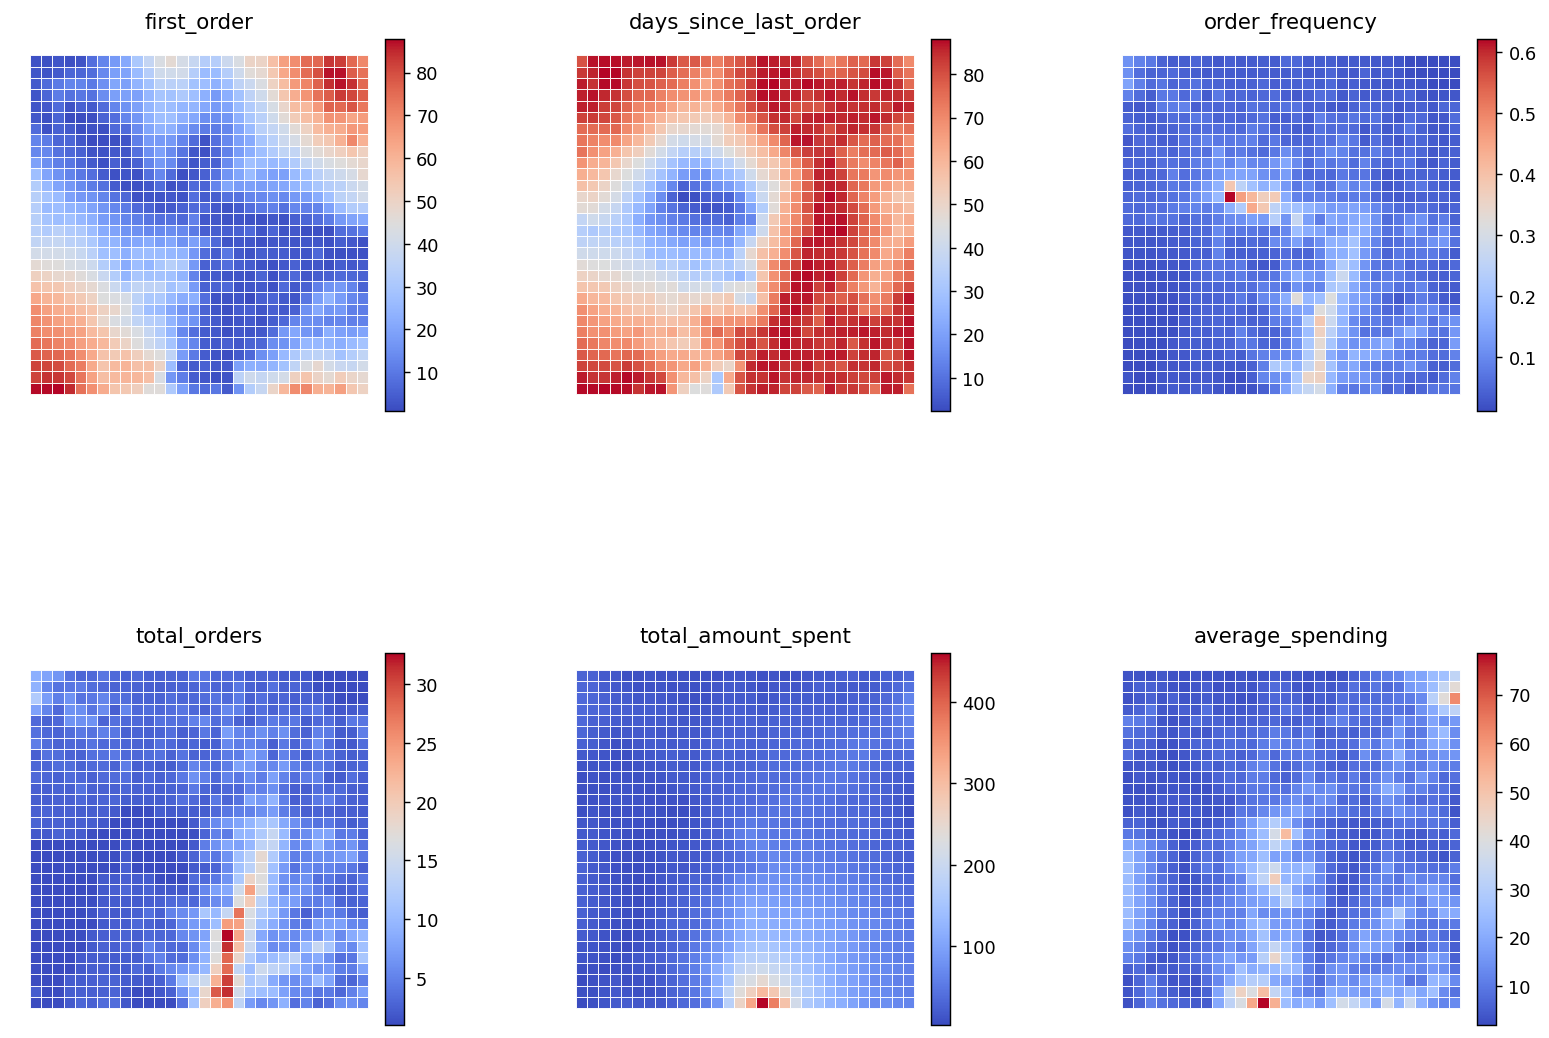

In [44]:
figsize=(12, 8)
fig = plt.figure(figsize=figsize, constrained_layout=True, dpi=128)

subfigs = fig.subfigures(2, 3, wspace=0.2, hspace=0.4) 

colornorm = mpl_colors.Normalize(vmin=np.min(weights), vmax=np.max(weights))

for cpi, sf in zip(range(len(behaviors.columns)), subfigs.flatten()):
    
    matrix_vals = weights[:, :, cpi]
    vext = np.max(np.abs([np.min(matrix_vals), np.max(matrix_vals)]))
    colornorm = mpl_colors.Normalize(vmin=np.min(matrix_vals), vmax=np.max(matrix_vals))

    sf = plot_rectangles(
        sm, sf, 
        colornorm,
        matrix_vals,
        label=behaviors.columns[cpi],
        cmap=cm.coolwarm)

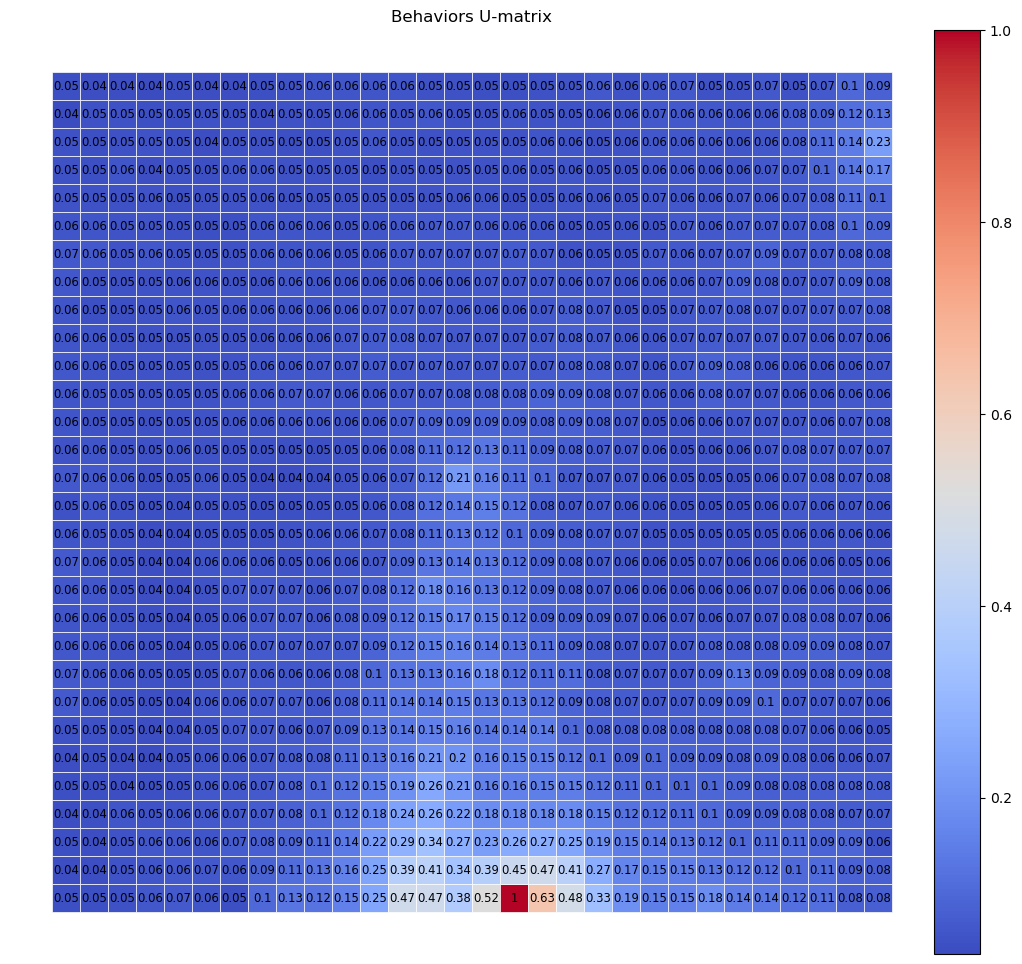

In [45]:
umatrix = sm.distance_map(scaling='mean')
fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=np.min(umatrix), vmax=np.max(umatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    umatrix,
                    label="Behaviors U-matrix",
                    cmap=cm.coolwarm,
                    annot=True)

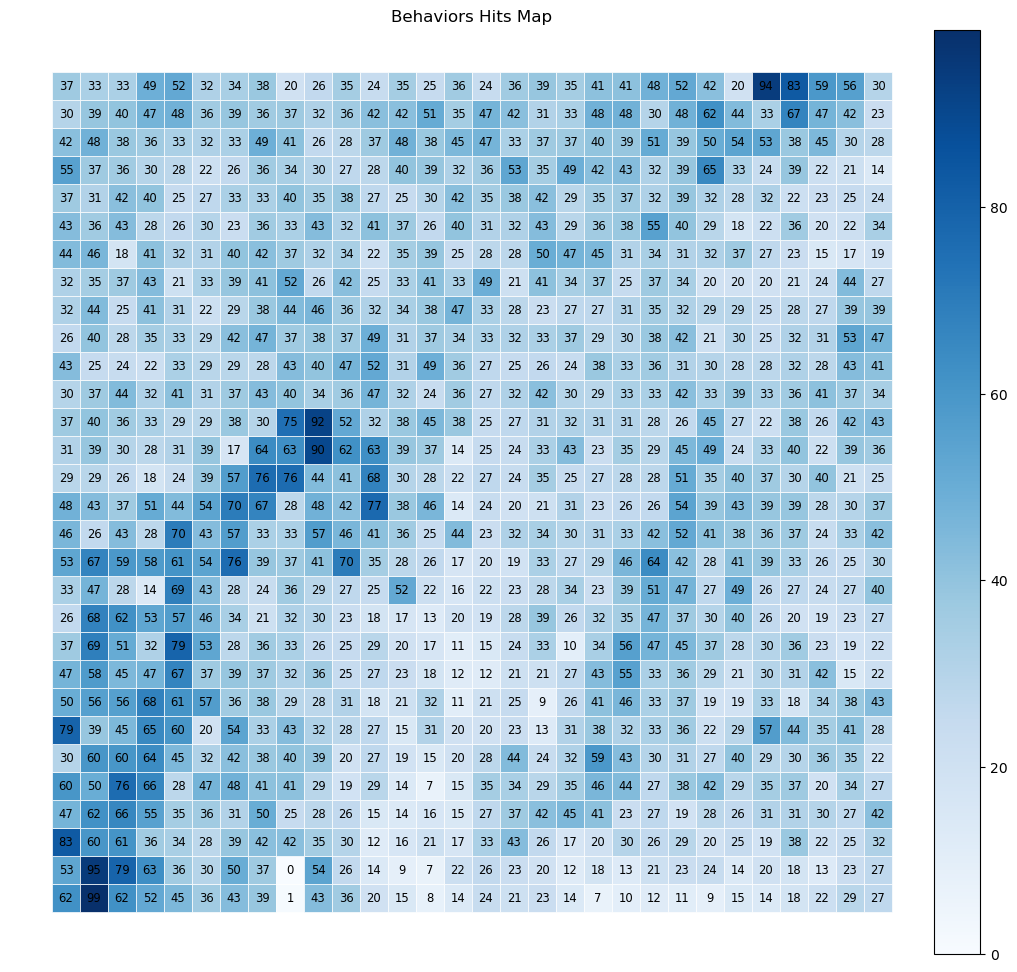

In [46]:
hitsmatrix = sm.activation_response(behaviors.values)


fig = plt.figure(figsize=(20,12))

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(hitsmatrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    hitsmatrix,
                    label="Behaviors Hits Map",
                    cmap=cm.Blues,
                    annot=True)

In [47]:
range_clusters = range(1, 10)
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(behaviors)
    inertia.append(kmclust.inertia_)

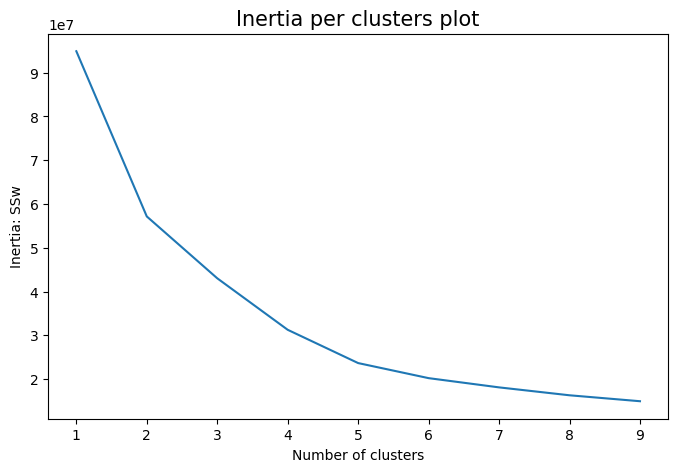

In [48]:
# Plotting inertia

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia per clusters plot", size=15)

plt.show()

In [49]:
behaviors_weights_flat = sm.get_weights().reshape((M*N),len(behaviors.columns))
behaviors_weights_flat.shape

(900, 6)

In [50]:
# Perform K-Means clustering on top of the SOM weights
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=20, random_state=42)
kmeans_behaviors_labels = kmeans.fit_predict(behaviors_weights_flat)

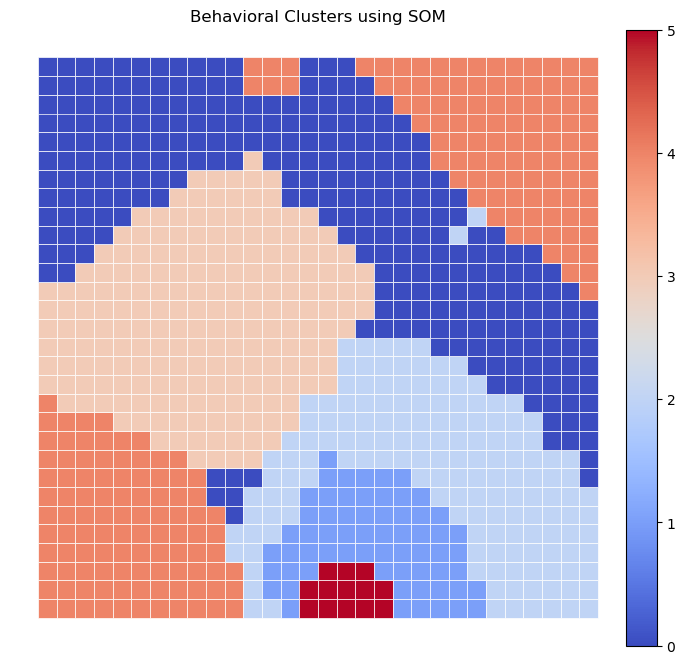

In [51]:
kmeans_matrix = kmeans_behaviors_labels.reshape((M,N))

fig = plt.figure(figsize=figsize)

colornorm = mpl_colors.Normalize(vmin=0, vmax=np.max(kmeans_matrix))

fig = plot_rectangles(sm, fig, 
                    colornorm,
                    kmeans_matrix,
                    label="Behavioral Clusters using SOM",
                    cmap=cm.coolwarm)

In [52]:
# Evaluate the clustering quality using silhouette score and Davies-Bouldin index
som_behaviors_score = silhouette_score(behaviors_weights_flat, kmeans_behaviors_labels, metric='euclidean')
# The silhouette score ranges from -1 to 1, where a higher value indicates better clustering
print(f'Silhouette Score: {round(som_behaviors_score,3)}') 

som_behaviors_index = davies_bouldin_score(behaviors_weights_flat, kmeans_behaviors_labels)
# The Davies-Bouldin index ranges from 0 to infinity, where a lower value indicates better clustering
print(f'Davies-Bouldin Index: {round(som_behaviors_index,3)}') 

Silhouette Score: 0.338
Davies-Bouldin Index: 0.888


In [53]:
# Check the nodes and and respective clusters
behavior_nodes = behaviors_weights_flat

df_behaviors_nodes = pd.DataFrame(behavior_nodes, columns=behaviors.columns)
df_behaviors_nodes['som_cluster'] = kmeans_behaviors_labels
df_behaviors_nodes

first_order  days_since_last_order  order_frequency  total_orders  \
0      87.502540              87.650398         0.011867      1.039552   
1      81.497240              86.299289         0.025358      2.191968   
2      81.773982              82.070727         0.013117      1.078761   
3      77.998585              78.425088         0.015178      1.192461   
4      75.350466              75.382896         0.013342      1.005637   
..           ...                    ...              ...           ...   
895    72.712063              85.251255         0.047618      4.040668   
896    77.379996              82.931207         0.027910      2.324618   
897    75.630832              75.756234         0.013685      1.031929   
898    73.844615              73.844626         0.013567      1.000003   
899    69.892763              69.892763         0.014319      1.000000   

     total_amount_spent  average_spending  som_cluster  
0              2.828251          2.706697            4  
1              6.847724          3.674901            4  
2              3.154686          2.949443            4  
3              6.501974          5.669225            4  
4             11.857688         11.832661            4  
..                  ...               ...          ...  
895           60.760812         16.177152            4  
896           70.140178         32.318908            4  
897           62.963032         62.027836            4  
898           41.827809         41.827725            4  
899           32.463642         32.463642            4  

[900 rows x 7 columns]

In [54]:
# Getting BMU coordinates for each data point
bmu_index = np.array([sm.winner(x) for x in behaviors.values])

print(bmu_index.shape)

bmu_index

(31509, 2)


array([[12, 17],
       [11, 17],
       [ 9, 17],
       ...,
       [27, 28],
       [27, 28],
       [ 0,  0]])

In [55]:
som_final_behavior_labels = [kmeans_matrix[i[0]][i[1]] for i in bmu_index]

In [56]:
behaviors_columns = behaviors.columns.tolist()

df_behaviors = behaviors.copy()
df_behaviors['som_cluster'] = som_final_behavior_labels

df_behaviors.head()

first_order  days_since_last_order  order_frequency  \
customer_id                                                        
1b8f824d5e           0.0                      1              2.0   
5d272b9dcb           0.0                      1              2.0   
f6d1b2ba63           0.0                      1              2.0   
180c632ed8           0.0                      2              1.0   
4eb37a6705           0.0                      2              1.0   

             total_orders  total_amount_spent  average_spending  som_cluster  
customer_id                                                                   
1b8f824d5e              2               28.88            14.440            3  
5d272b9dcb              2               19.21             9.605            3  
f6d1b2ba63              2                9.20             4.600            3  
180c632ed8              2               31.56            15.780            3  
4eb37a6705              2               55.44            27.720            3

In [57]:
# Characterizing the final clusters
df_behaviors[behaviors_columns + ['som_cluster']].groupby('som_cluster').mean()

first_order  days_since_last_order  order_frequency  \
som_cluster                                                        
0              15.901582              74.208620         0.059957   
1              12.011576              80.776849         0.161764   
2              16.022809              76.880814         0.102128   
3              18.408510              29.684758         0.097211   
4              61.565697              72.800475         0.027967   
5               6.571429              84.691030         0.244131   

             total_orders  total_amount_spent  average_spending  
som_cluster                                                      
0                4.444845           26.451917          6.908009  
1               13.102251          145.882797         15.166665  
2                7.901610           73.967191         12.919114  
3                2.028718           18.211312         10.557570  
4                2.044273           19.745823         11.239991  
5               20.734219          285.605183         16.632578

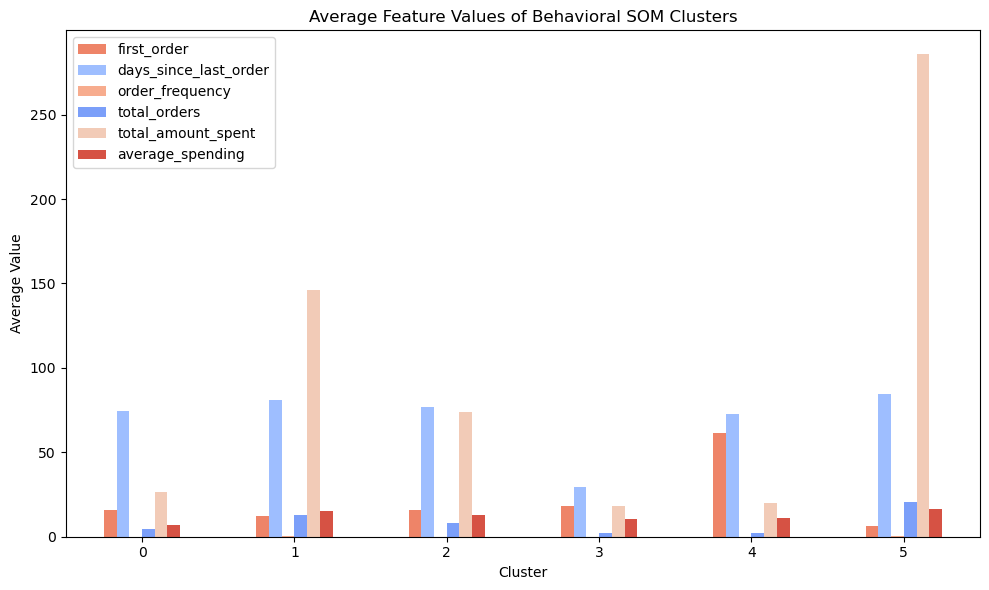

In [58]:
features = ['first_order','days_since_last_order', 'order_frequency', 'total_orders', 
            'total_amount_spent', 'average_spending']

# Group by 'som_clusters' and compute the mean
cluster_means = df_behaviors[features + ['som_cluster']].groupby('som_cluster').mean()

# Use coolwarm colormap to color the bars
cmap = cm.coolwarm
first_order_color = cmap(0.8)
days_since_last_order_color = cmap(0.3)
order_frequency_color = cmap(0.7)
total_orders_color = cmap(0.2)
total_amount_spent_color = cmap(0.6)
average_spending_color = cmap(0.9)

colors = [first_order_color, days_since_last_order_color, order_frequency_color,
          total_orders_color, total_amount_spent_color, average_spending_color]

# Plotting the bar plot
ax = cluster_means.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Average Feature Values of Behavioral SOM Clusters')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Analysing the appropriateness of our solution using R²

In [59]:
# using R²
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_behaviors)  # get total sum of squares
ssw_labels = df_behaviors[behaviors_columns + ['som_cluster']].groupby('som_cluster').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
round(r2, 3)

0.785

### Cluster visualization using U-Map

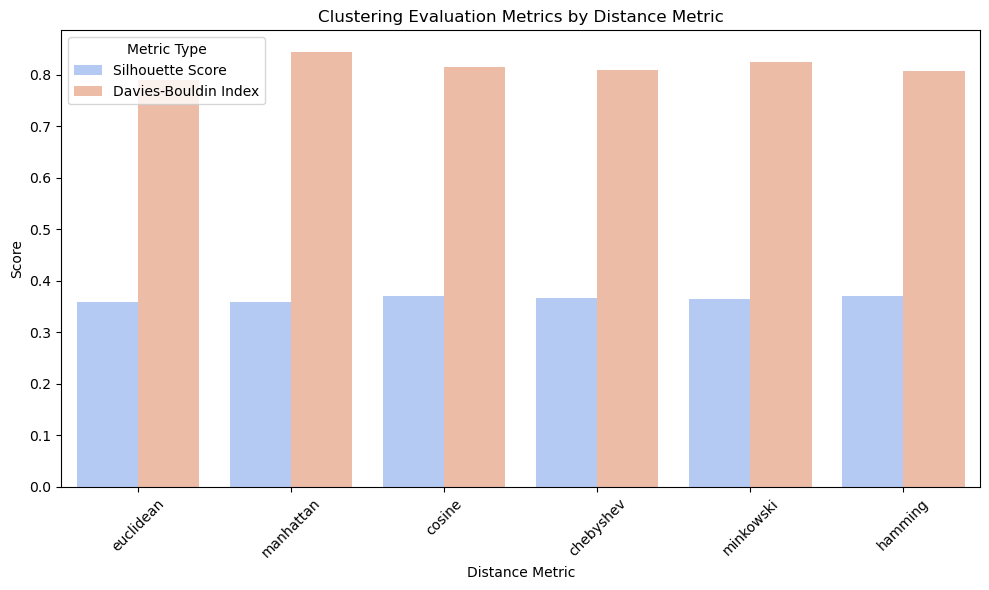

In [60]:
distance_metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'minkowski', 'hamming']

# Initialize lists to store results
silhouette_scores = []
db_scores = []

# Loop through each distance metric
for metric in distance_metrics:
    # Apply UMAP with the current metric
    reducer = umap.UMAP(n_neighbors=6, n_components=2, metric=metric)
    embedding = reducer.fit_transform(df_behaviors[behaviors_columns])

    # Perform clustering
    kmeans = KMeans(n_clusters=25, random_state=42).fit(embedding)
    cluster_labels = kmeans.labels_

    # Evaluate clustering
    silhouette = silhouette_score(embedding, cluster_labels)
    db_index = davies_bouldin_score(embedding, cluster_labels)

    silhouette_scores.append(silhouette)
    db_scores.append(db_index)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': distance_metrics,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': db_scores
})

# Reshape data for plotting
results_melted = results_df.melt(id_vars='Metric', value_vars=['Silhouette Score', 'Davies-Bouldin Index'], 
                                 var_name='Metric Type', value_name='Score')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Metric Type', data=results_melted, palette='coolwarm')

# Adjusting plot aesthetics
plt.title('Clustering Evaluation Metrics by Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
reducer = umap.UMAP(n_neighbors=6, n_components=2, metric='euclidean') 
# The number of neighbors was chosen by experimenting and comparing silhouette scores and Davies-Bouldin indexes
# The cosine metric was chosen since it performed better in the previous plot
embedding = reducer.fit_transform(df_behaviors[behaviors_columns], y=df_behaviors['som_cluster']) 
embedding

array([[ 8.8679285 , 17.113846  ],
       [11.396054  , 17.996996  ],
       [12.287407  , 18.435497  ],
       ...,
       [ 7.484898  ,  0.3252762 ],
       [ 7.4511333 ,  0.31949076],
       [16.13513   , -2.644375  ]], dtype=float32)

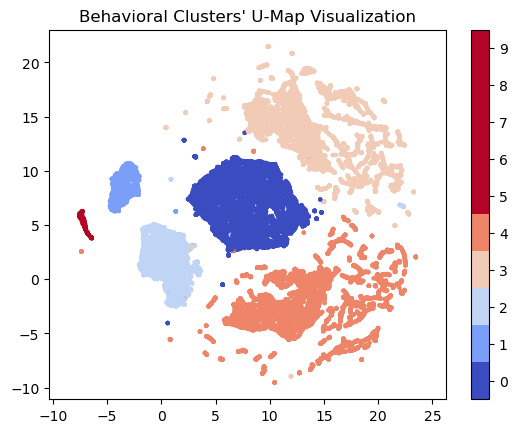

In [62]:
plt.scatter(embedding[:, 0], embedding[:, 1], c= df_behaviors['som_cluster'], cmap='coolwarm', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("Behavioral Clusters' U-Map Visualization")
plt.show()

In [63]:
silhouette_avg = silhouette_score(embedding, df_behaviors['som_cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(embedding, df_behaviors['som_cluster'])
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.46
Davies-Bouldin Index: 0.64


### Cluster visualization using t-SNE

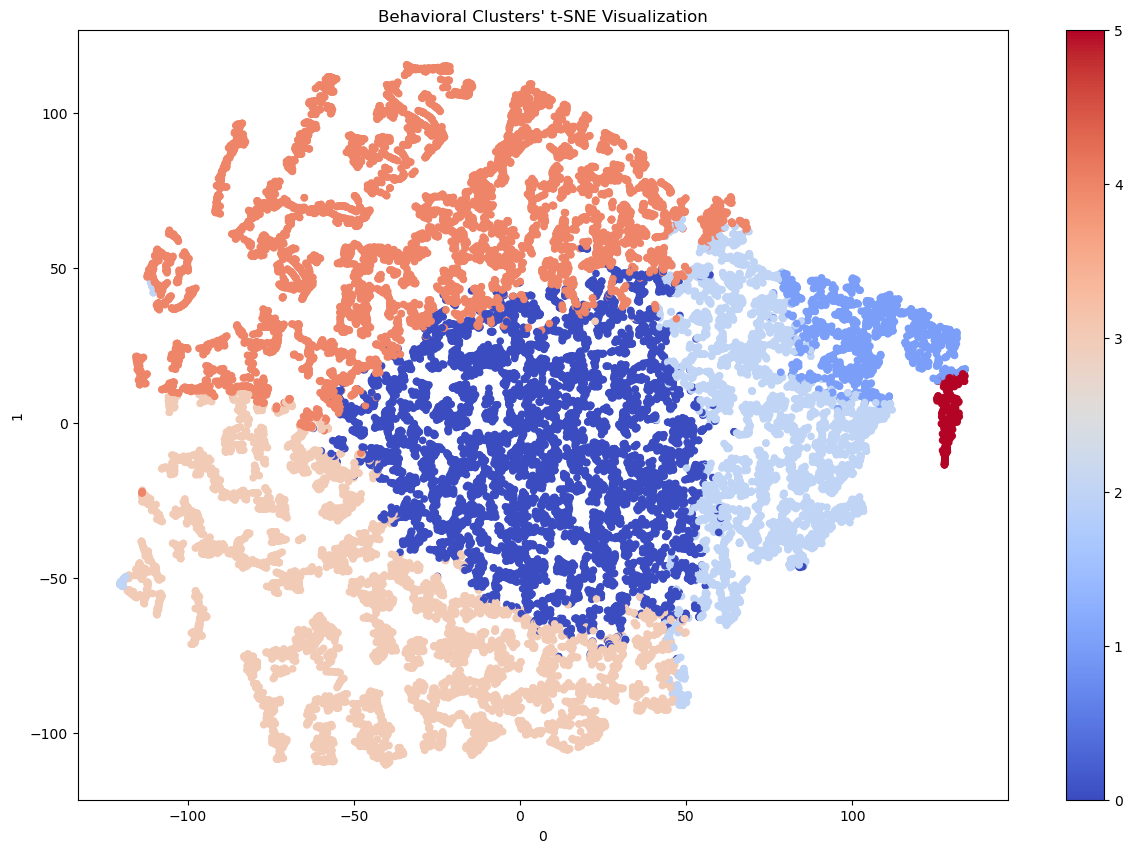

In [64]:
# This is step can be quite time consuming - don't forget to only use metric features
two_dim = TSNE(random_state=42).fit_transform(df_behaviors[behaviors_columns])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_behaviors['som_cluster'], colormap='coolwarm', figsize=(15,10))
plt.title("Behavioral Clusters' t-SNE Visualization")
plt.show()

## K-Means

In [65]:
# preference features focus more on consumers' habits and preferences, reflecting their choices and inclinations
preferences_features = ['vendor_loyalty_score', 'relative_cuisine_variety', 'chain_consumption']
# behavioural features focus more on customer behaviour patterns, such as purchasing tendencies, engament levels and habits
behavioural_features = ['first_order', 'days_since_last_order', 'order_frequency', 
                        'total_orders', 'total_amount_spent', 'average_spending']

df_prf = df[preferences_features].copy()
df_beh = df[behavioural_features].copy()

In [68]:
from sklearn.base import clone 
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# set up the clusterers
# n_init = 10 and random_state = 20
kmeans = KMeans(
    init='k-means++',
    n_init=10,
    random_state=20
)

hierarchical = AgglomerativeClustering(
    metric='euclidean'
)

#### Optimal Clusteres on Preferences Variables

In [69]:
# obtain the R² scores for each cluster solution on preferences variables
r2_scores_prf = {}
r2_scores_prf['kmeans'] = get_r2_scores(df_prf, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_prf[linkage] = get_r2_scores(
        df_prf, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores_prf)

kmeans  complete   average    single      ward
2  0.446701  0.352085  0.315985  0.315985  0.377407
3  0.687621  0.569194  0.608894  0.608894  0.637686
4  0.830292  0.584102  0.814097  0.663153  0.773555
5  0.878681  0.840911  0.828110  0.663216  0.863973
6  0.911628  0.855655  0.860160  0.663384  0.896514
7  0.933783  0.892766  0.860182  0.663453  0.922862
8  0.945493  0.894002  0.860255  0.663571  0.934796
9  0.954501  0.902806  0.910887  0.663571  0.945834

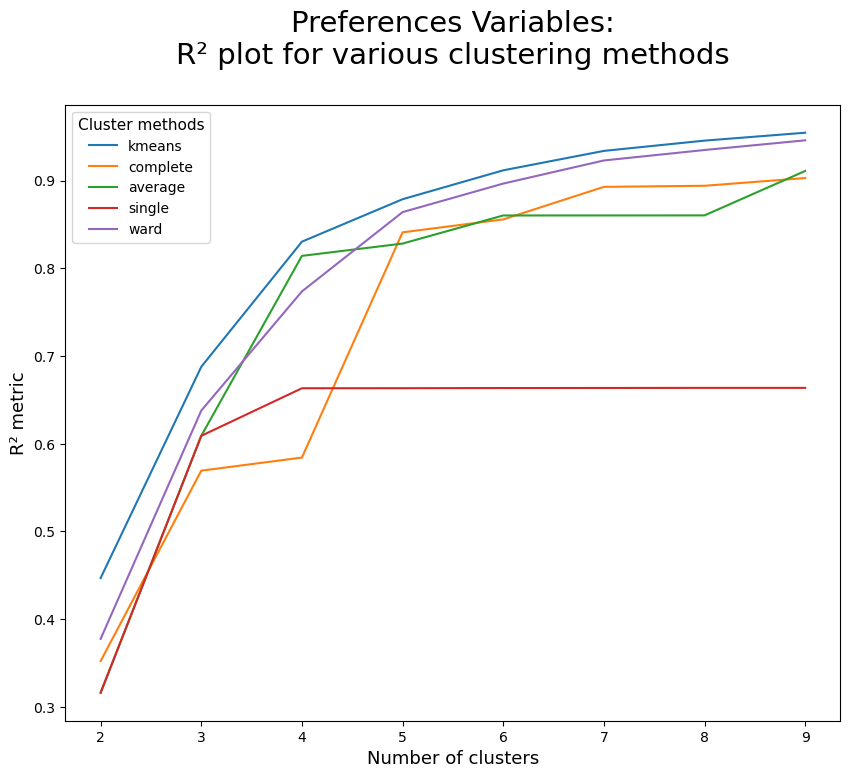

In [70]:
# visualize the R² scores for each cluster solution on preferences variables
pd.DataFrame(r2_scores_prf).plot.line(figsize=(10,8))

plt.title("Preferences Variables:\nR² plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R² metric", fontsize=13)
plt.show()

#### Optimal Clusterer on Behavioural Variables

In [71]:
# obtain the R² scores for each cluster solution on behavioural variables
r2_scores_beh = {}
r2_scores_beh['kmeans'] = get_r2_scores(df_beh, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores_beh[linkage] = get_r2_scores(
        df_beh, hierarchical.set_params(linkage=linkage)
    )

pd.DataFrame(r2_scores_beh)

kmeans  complete   average    single      ward
2  0.397645  0.160723  0.073063  0.010818  0.346299
3  0.546493  0.165639  0.074867  0.011090  0.500037
4  0.670454  0.434348  0.385555  0.019244  0.642747
5  0.750562  0.437910  0.410271  0.019765  0.711135
6  0.786825  0.451300  0.412765  0.020077  0.751663
7  0.809059  0.572002  0.412901  0.022422  0.778669
8  0.828069  0.584167  0.413010  0.023501  0.799871
9  0.842355  0.595329  0.413567  0.023695  0.812398

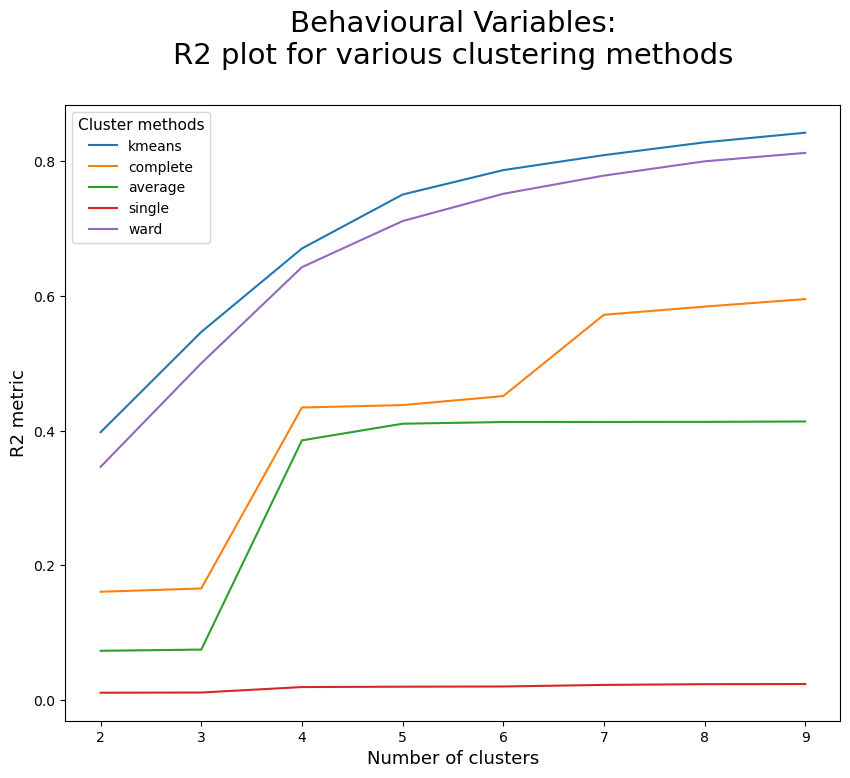

In [72]:
# visualizing the R² scores for each cluster solution on behavioural variables
pd.DataFrame(r2_scores_beh).plot.line(figsize=(10,8))

plt.title("Behavioural Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

- We chose to use KMeans for our clusters because the previous two graphs clearly show that it consistently achieves the highest R² values.

### Preferential Perspective

In [73]:
# KMeans clustering algorithm
# grouped into 9 distinct clusters
# selects initial centroids randomly
# run the KMeans algorithm 10 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=9, init='random', n_init=10, random_state=1)

In [74]:
# fit method
kmclust_prf.fit(df[preferences_features])

KMeans(init='random', n_clusters=9, n_init=10, random_state=1)

In [75]:
kmclust_prf.predict(df[preferences_features])

array([7, 2, 5, ..., 8, 5, 5], dtype=int32)

In [76]:
pd.DataFrame(kmclust_prf.transform(df[preferences_features]))

0         1         2         3         4         5         6  \
0      0.411976  0.496830  0.500384  0.564410  0.352097  0.707457  0.620485   
1      0.721271  0.982300  0.100570  0.231418  0.391239  0.525301  0.466675   
2      1.047139  1.133389  0.504420  0.743883  0.815899  0.005603  0.967169   
3      0.356587  0.482707  0.493750  0.544665  0.311383  0.711366  0.562724   
4      0.462471  0.069622  0.993602  1.018231  0.730492  1.120733  0.934803   
...         ...       ...       ...       ...       ...       ...       ...   
31504  1.051182  1.135018  0.506881  0.747262  0.819501  0.022269  0.973753   
31505  1.051182  1.135018  0.506881  0.747262  0.819501  0.022269  0.973753   
31506  0.877469  0.572934  1.114160  1.238398  1.019318  1.000016  1.244914   
31507  1.047139  1.133389  0.504420  0.743883  0.815899  0.005603  0.967169   
31508  1.051182  1.135018  0.506881  0.747262  0.819501  0.022269  0.973753   

              7         8  
0      0.113036  0.707805  
1      0.508212  1.128306  
2      0.724497  1.000109  
3      0.017814  0.710424  
4      0.497242  0.504680  
...         ...       ...  
31504  0.726885  1.000494  
31505  0.726885  1.000494  
31506  0.720250  0.014761  
31507  0.724497  1.000109  
31508  0.726885  1.000494  

[31509 rows x 9 columns]

In [77]:
# KMeans clustering algorithm
# grouped into 8 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_prf = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust_prf.fit(df[preferences_features])

KMeans(n_init=15, random_state=1)

In [78]:
# cluster range for preferential perspective
range_clusters_prf = range(1, 10)

In [79]:
# empty list to store the inertia values for each number of clusters
inertia_prf = []
for n_clus_prf in range_clusters_prf:  # iterate over desired ncluster range
    kmclust_prf = KMeans(n_clusters=n_clus_prf, init='k-means++', n_init=15, random_state=1)
    kmclust_prf.fit(df[preferences_features])
    inertia_prf.append(kmclust_prf.inertia_) 

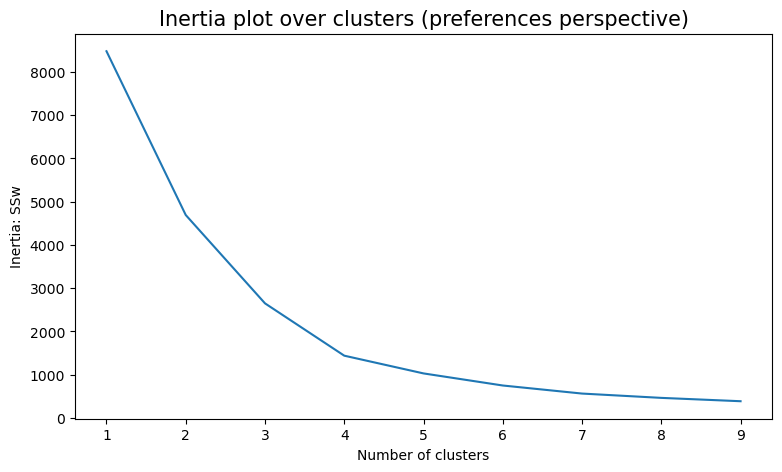

In [80]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_prf, inertia_prf)
ax.set_xticks(range_clusters_prf)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (preferences perspective)", size=15)

plt.show()

- From this Elbow plot, we can observe that the optimal number of clusters for the preferences perspective is 3, as this is the point where the rate of decrease in within-cluster sum of squares (WSS) significantly slows down.

For n_clusters = 2, the average silhouette_score is : 0.4299116482013257
For n_clusters = 3, the average silhouette_score is : 0.5287699284144854
For n_clusters = 4, the average silhouette_score is : 0.5766646601057627
For n_clusters = 5, the average silhouette_score is : 0.5566463367373877
For n_clusters = 6, the average silhouette_score is : 0.575733596692114
For n_clusters = 7, the average silhouette_score is : 0.5928341714100998
For n_clusters = 8, the average silhouette_score is : 0.5968993745804453
For n_clusters = 9, the average silhouette_score is : 0.6051092720717964


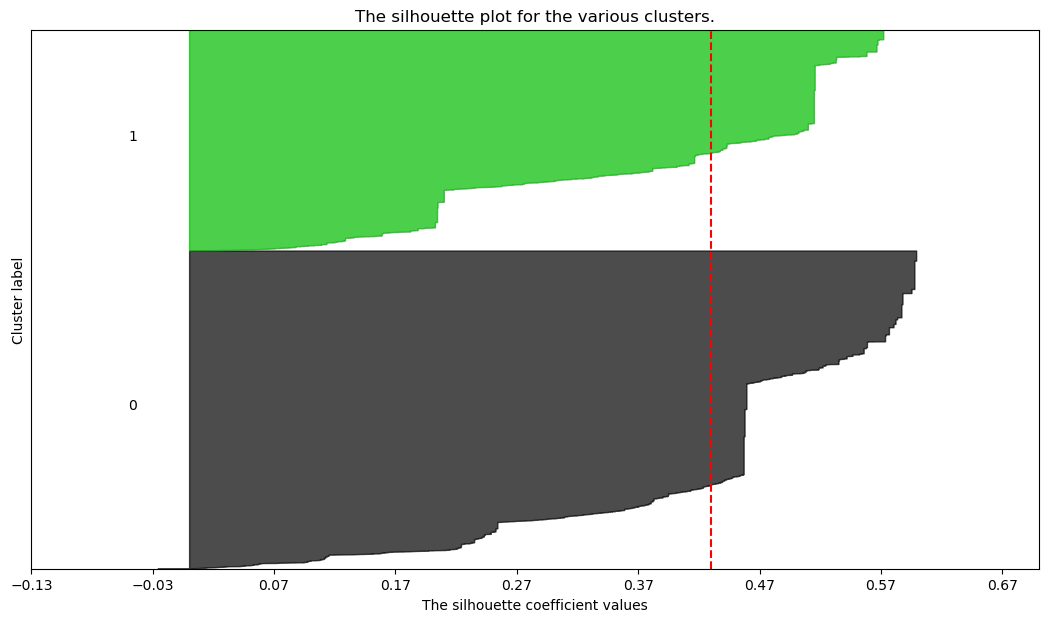

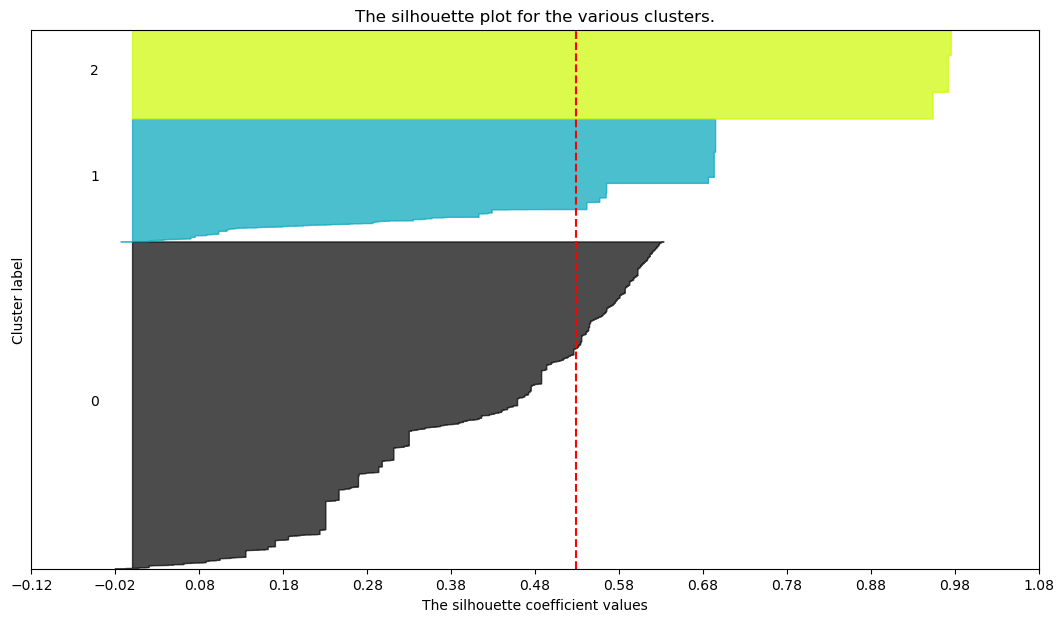

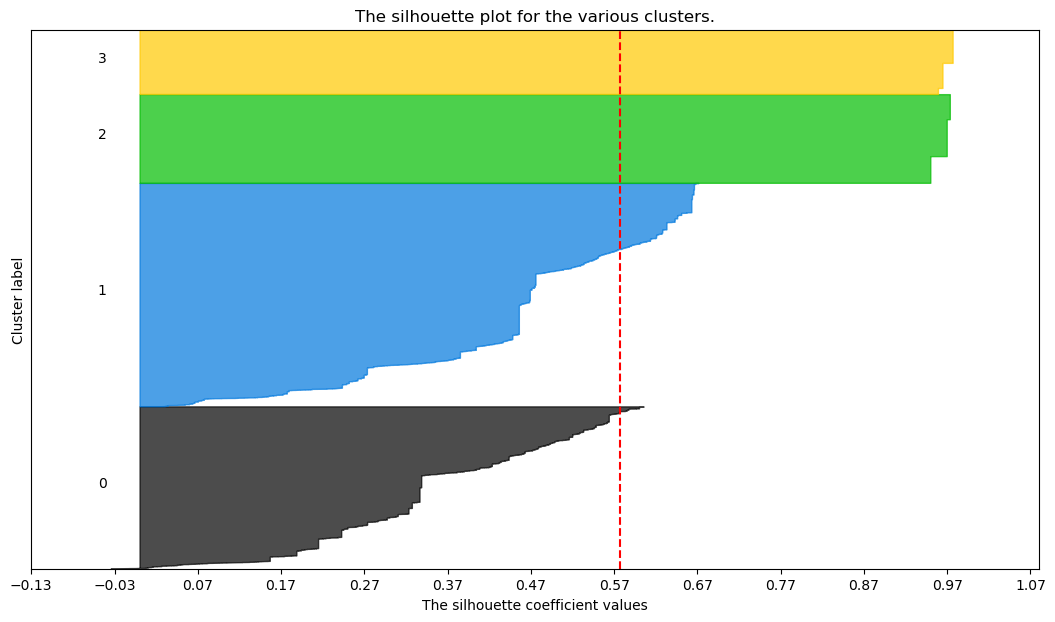

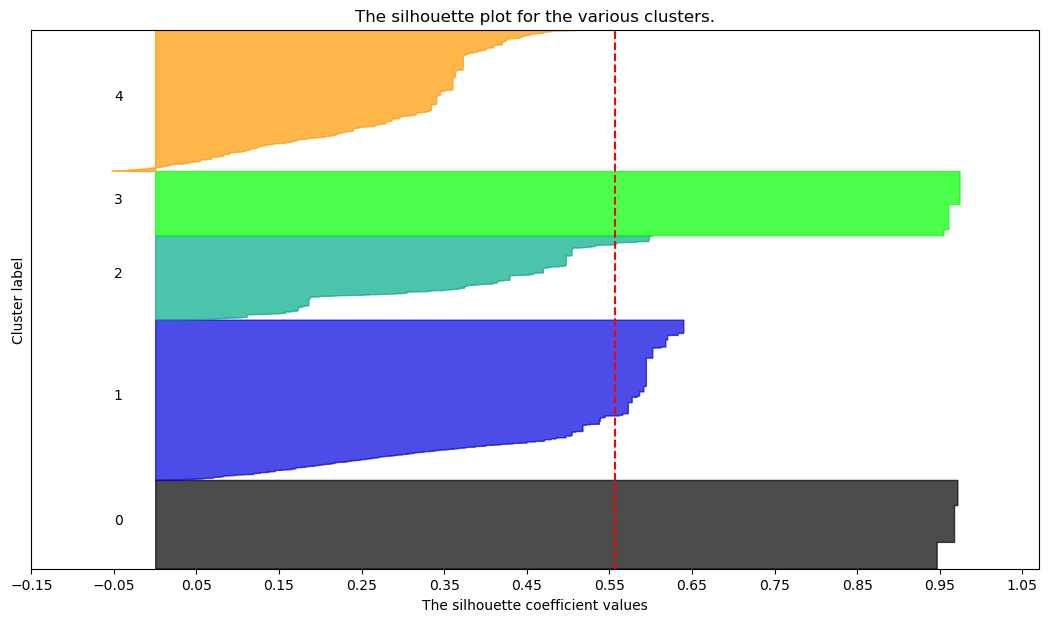

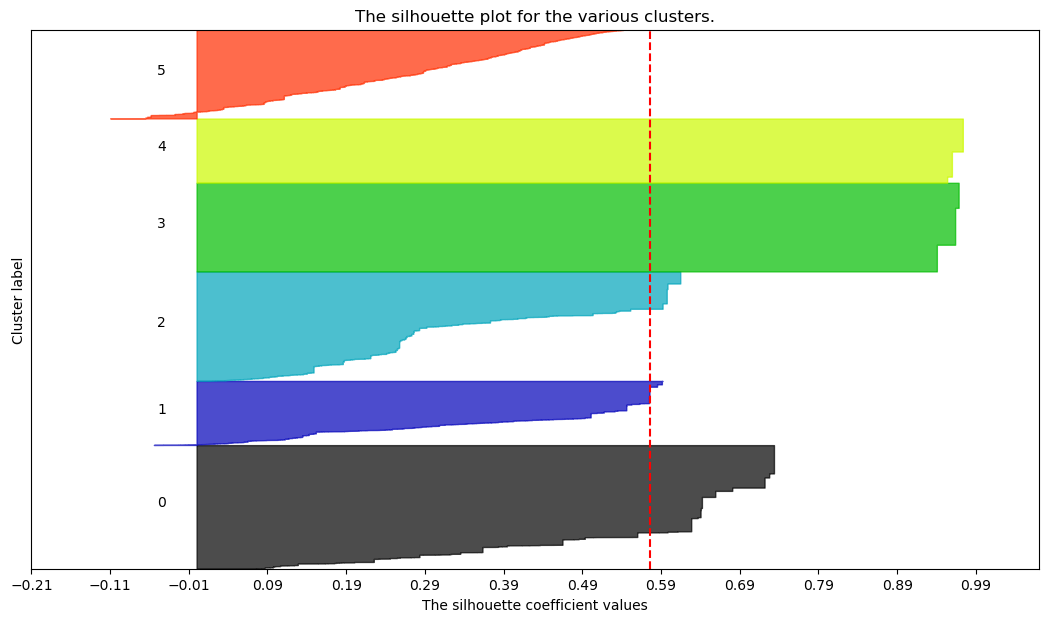

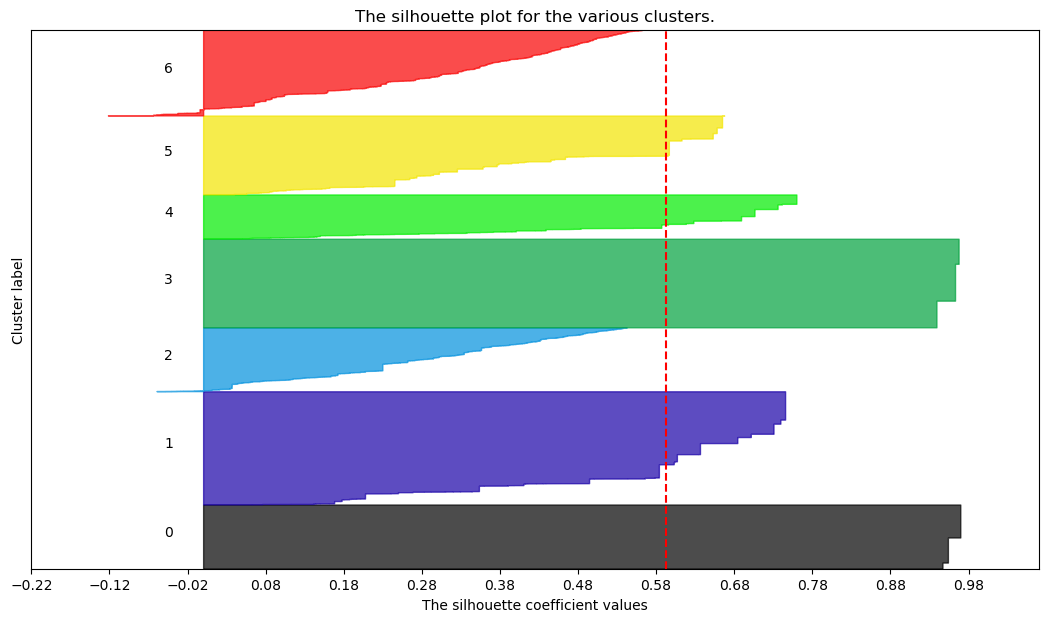

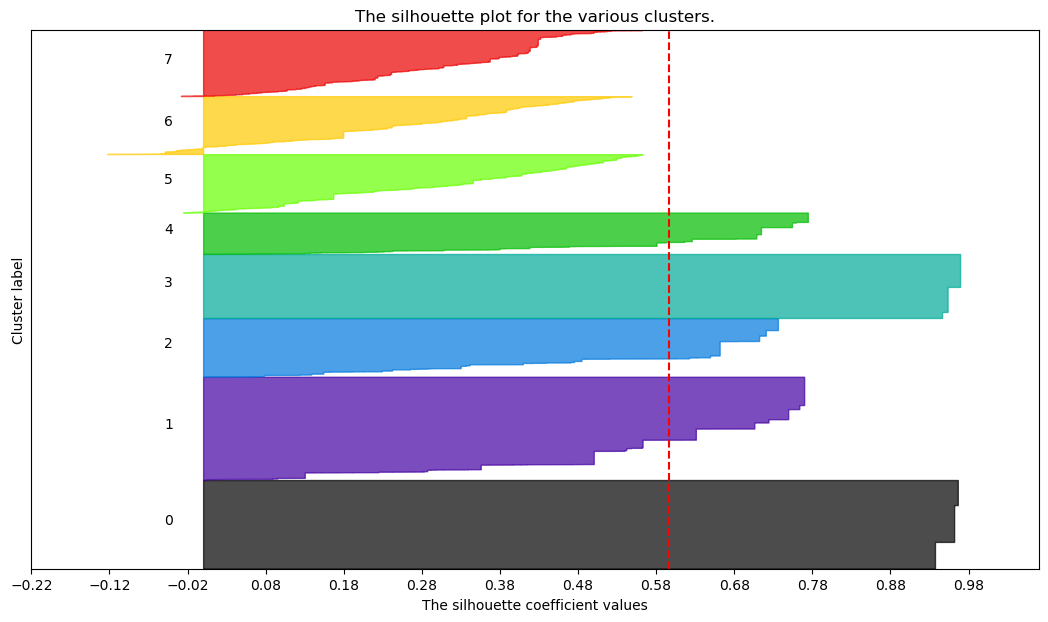

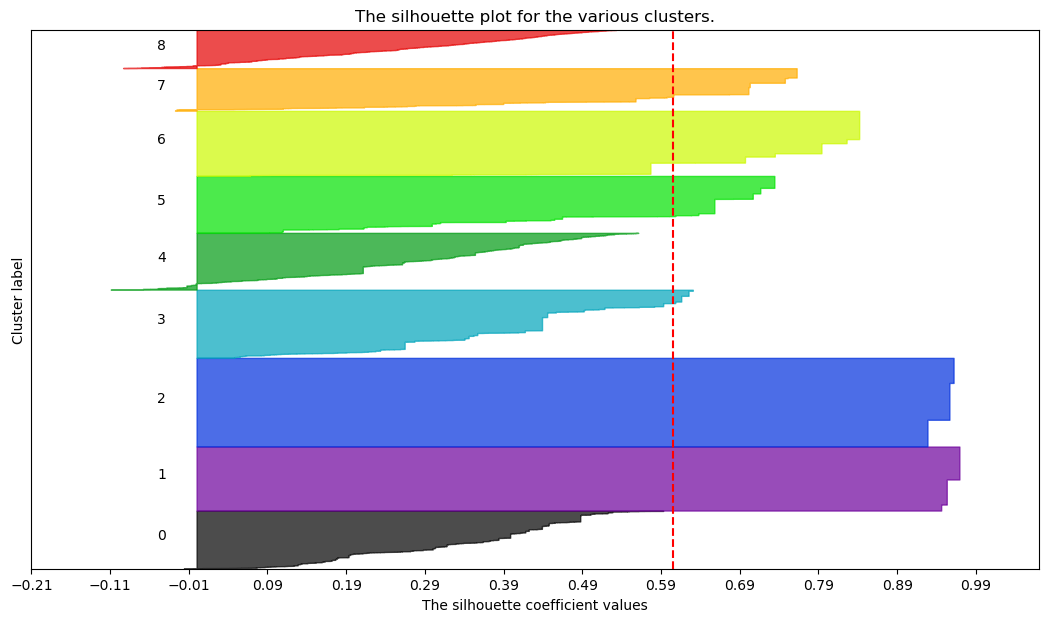

In [81]:
# storing average silhouette metric
avg_silhouette_prf = []
for nclus_prf in range_clusters_prf:
    # skip nclus == 1
    if nclus_prf == 1:
        continue
    
    fig = plt.figure(figsize=(13, 7))

    # initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility
    kmclust_prf = KMeans(n_clusters=nclus_prf, init='k-means++', n_init=15, random_state=1)
    cluster_labels_prf = kmclust_prf.fit_predict(df[preferences_features])

    # the silhouette_score gives the average value for all the samples.
    # this gives a perspective into the density and separation of the formed clusters
    silhouette_avg_prf = silhouette_score(df[preferences_features], cluster_labels_prf)
    avg_silhouette_prf.append(silhouette_avg_prf)
    print(f"For n_clusters = {nclus_prf}, the average silhouette_score is : {silhouette_avg_prf}")

    # the silhouette scores for each sample
    sample_silhouette_values_prf = silhouette_samples(df[preferences_features], cluster_labels_prf)

    y_lower = 10
    for i in range(nclus_prf):
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values_prf = sample_silhouette_values_prf[cluster_labels_prf == i]
        ith_cluster_silhouette_values_prf.sort()
        
        # get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values_prf.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus_prf)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_prf,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # the vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg_prf, color="red", linestyle="--")
    
    # the silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values_prf.min() -0.1, 2), np.round(sample_silhouette_values_prf.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # the (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[preferences_features]) + (nclus_prf + 1) * 10])

    plt.yticks([])  # clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

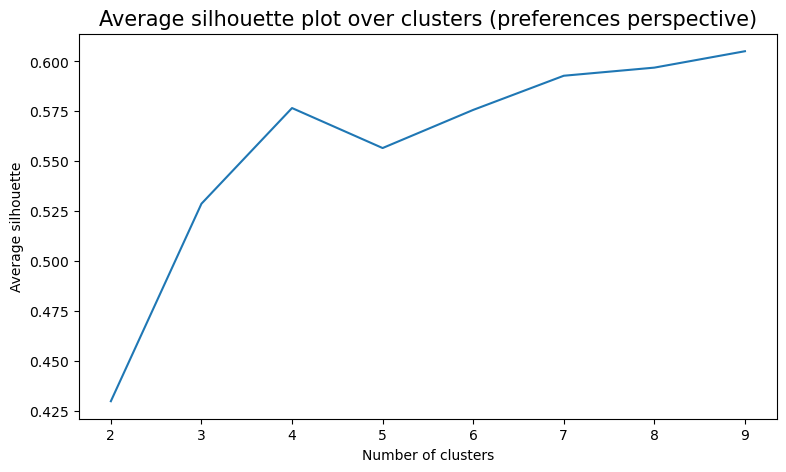

In [82]:
# average silhouette plot for preferential perspective
# inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters_prf[1:], # X-axis; 
         avg_silhouette_prf)     # Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters (preferences perspective)", size=15)
plt.show()

- From the Silhouette plot, for the preferences perspective, the optimal number of clusters is 5, as this is the point where the average silhouette score reaches its peak. 

In [83]:
# final cluster solution of the preferential perspective
number_clusters_prf = 5
kmclust_prf = KMeans(n_clusters=number_clusters_prf, init='k-means++', n_init=15, random_state=1)
km_labels_prf = kmclust_prf.fit_predict(df[preferences_features])
km_labels_prf

array([4, 1, 0, ..., 3, 0, 0], dtype=int32)

In [84]:
# characterizing the final clusters of the preferential perspective
df_concat = pd.concat((df[preferences_features], pd.Series(km_labels_prf, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

vendor_loyalty_score  relative_cuisine_variety  chain_consumption
labels                                                                   
0                   1.000000                  0.088936           1.000000
1                   0.344232                  0.221784           0.970813
2                   0.364291                  0.231789           0.145857
3                   1.000000                  0.098094           0.000000
4                   0.314045                  0.279054           0.575165

### Behavioural Perspective

In [85]:
# KMeans clustering algorithm
# grouped into 9 distinct clusters
# selects initial centroids randomly
# run the KMeans algorithm 10 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs
kmclust_beh = KMeans(n_clusters=9, init='random', n_init=10, random_state=1)

In [86]:
# fit method
kmclust_beh.fit(df[behavioural_features])

KMeans(init='random', n_clusters=9, n_init=10, random_state=1)

In [87]:
kmclust_beh.predict(df[behavioural_features])

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [88]:
pd.DataFrame(kmclust_beh.transform(df[behavioural_features]))

0           1           2           3           4          5  \
0      51.689988  103.393684   26.075461  109.823575  301.122991  81.181214   
1      51.354672  103.012092   23.074019  116.821912  310.482876  80.731050   
2      53.364604  103.808501   25.018997  124.641550  320.268169  81.782018   
3      51.198115  102.943001   26.907594  107.266869  298.263541  80.578440   
4      62.193551  109.330825   47.431847   93.545063  275.655291  88.511824   
...          ...         ...         ...         ...         ...        ...   
31504  90.191471   31.429393  104.209015  129.182164  327.324625  75.533119   
31505  90.156676   31.330553  104.183112  129.083736  327.213335  75.495604   
31506  88.458512   26.310053  103.540303  112.488946  306.400560  74.257808   
31507  88.290475   25.724937  103.352805  113.236389  307.475999  74.014902   
31508  91.222449   31.715993  105.407760  129.090094  326.724816  76.329817   

               6           7          8  
0      67.383715  171.091001  83.282717  
1      66.099776  179.697052  87.232581  
2      66.618434  188.844702  92.482226  
3      67.276977  168.262563  81.473278  
4      78.172173  148.386660  78.333421  
...          ...         ...        ...  
31504  62.076268  194.770035  93.311057  
31505  62.036060  194.662543  93.231805  
31506  61.594112  175.221907  82.109969  
31507  61.243925  176.186874  82.465307  
31508  63.133417  194.378661  93.611421  

[31509 rows x 9 columns]

In [89]:
# KMeans clustering algorithm
# grouped into 8 clusters
# 'k-means++' method for centroid initialization
# run the KMeans algorithm 15 times with different random initializations and choose the best solution
# set a random seed to ensure reproducibility of results across multiple runs 
kmclust_beh = KMeans(n_clusters=8, init='k-means++', n_init=15, random_state=1)
kmclust_beh.fit(df[behavioural_features])

KMeans(n_init=15, random_state=1)

In [90]:
# cluster range for behavioural perspective
range_clusters_beh = range(1, 10)

In [91]:
# empty list to store the inertia values for each number of clusters
inertia_beh = []
for n_clus_beh in range_clusters_beh:  # iterate over desired ncluster range
    kmclust_beh = KMeans(n_clusters=n_clus_beh, init='k-means++', n_init=15, random_state=1)
    kmclust_beh.fit(df[behavioural_features])
    inertia_beh.append(kmclust_beh.inertia_)

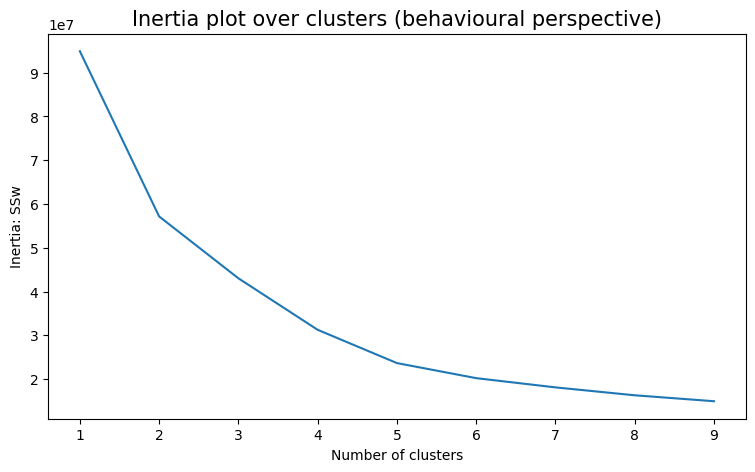

In [92]:
# inertia plot
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters_beh, inertia_beh)
ax.set_xticks(range_clusters_beh)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters (behavioural perspective)", size=15)

plt.show()

- Once again, from the graph we can observe that the optimal number of cluster for the behavioural perspective is 3.

For n_clusters = 2, the average silhouette_score is : 0.5268071595173277
For n_clusters = 3, the average silhouette_score is : 0.31366300457593105
For n_clusters = 4, the average silhouette_score is : 0.3625110662841436
For n_clusters = 5, the average silhouette_score is : 0.37183003647526275
For n_clusters = 6, the average silhouette_score is : 0.3590770131702025
For n_clusters = 7, the average silhouette_score is : 0.32328679673694716
For n_clusters = 8, the average silhouette_score is : 0.31424520807853795
For n_clusters = 9, the average silhouette_score is : 0.3171368569400425


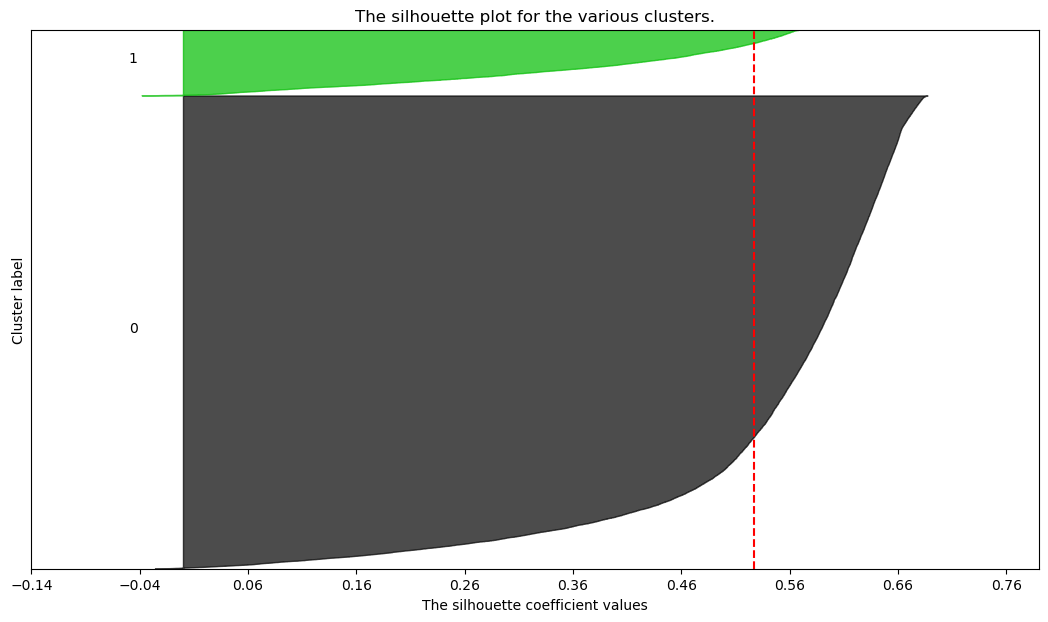

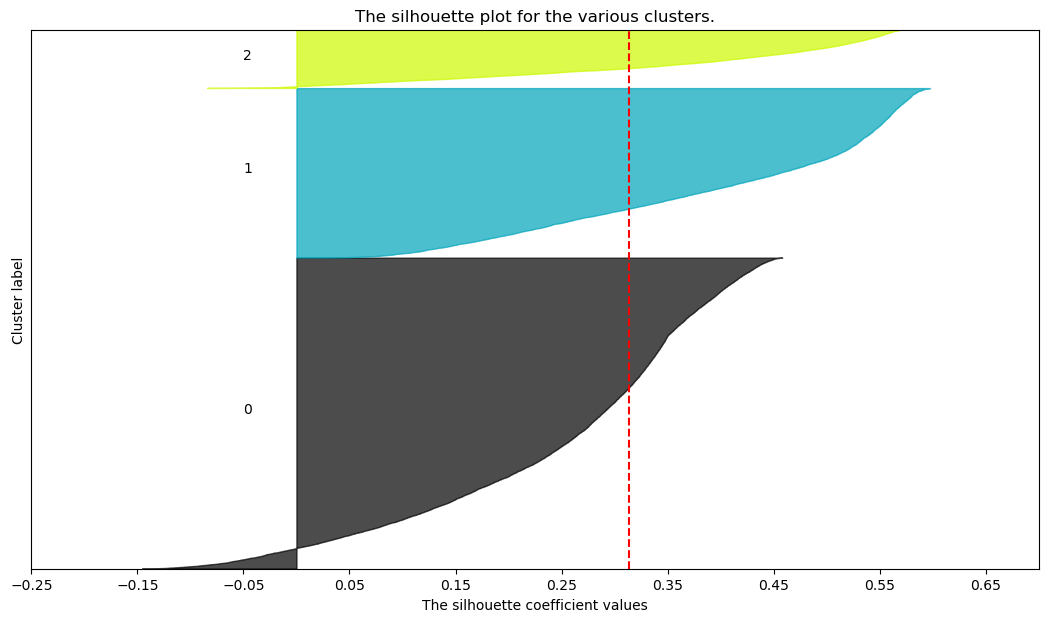

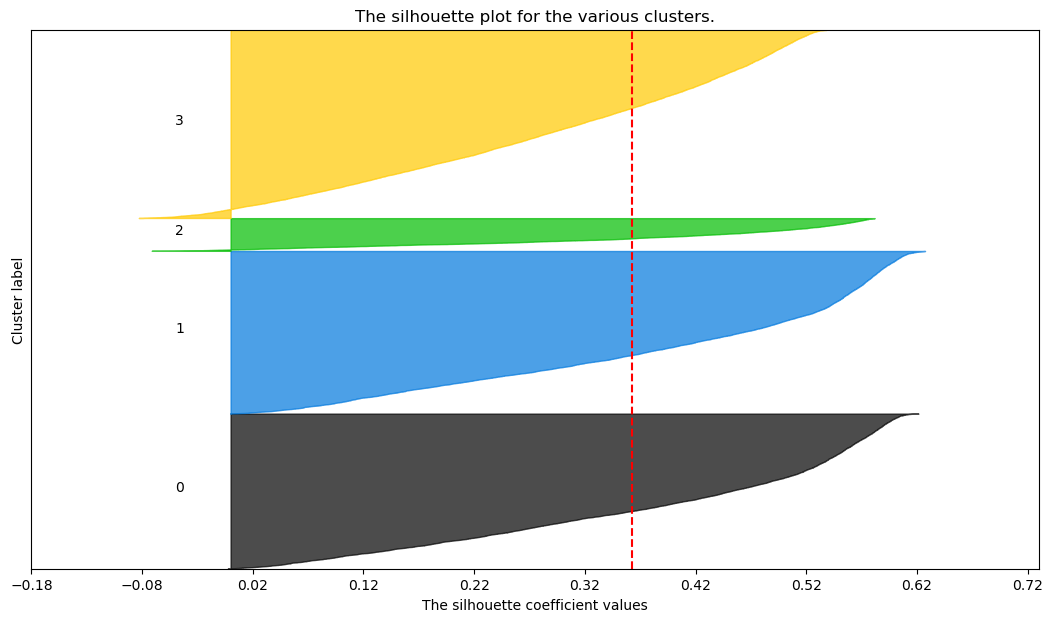

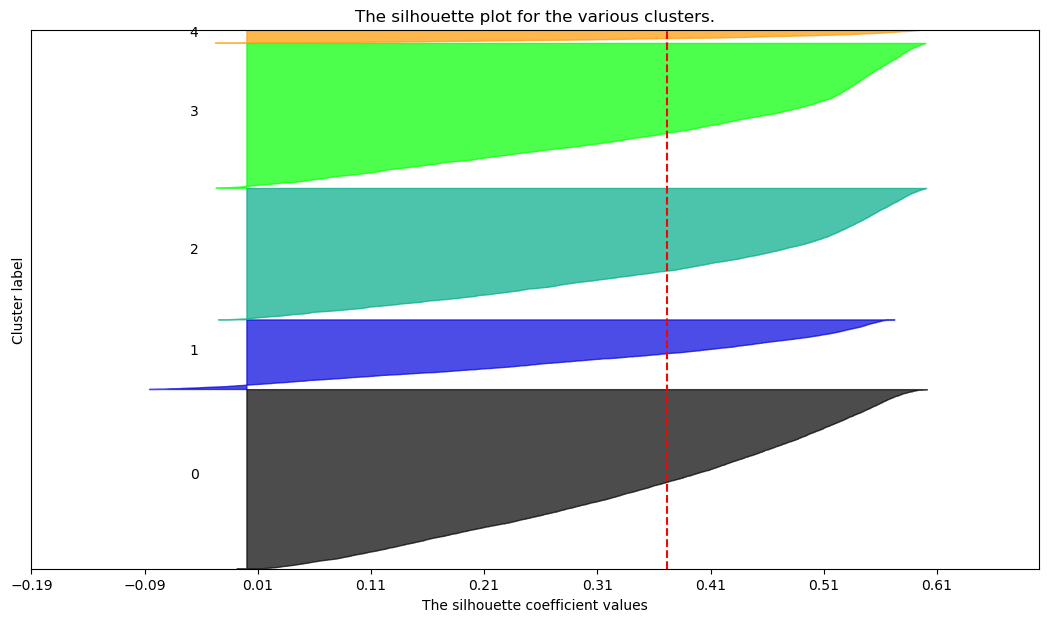

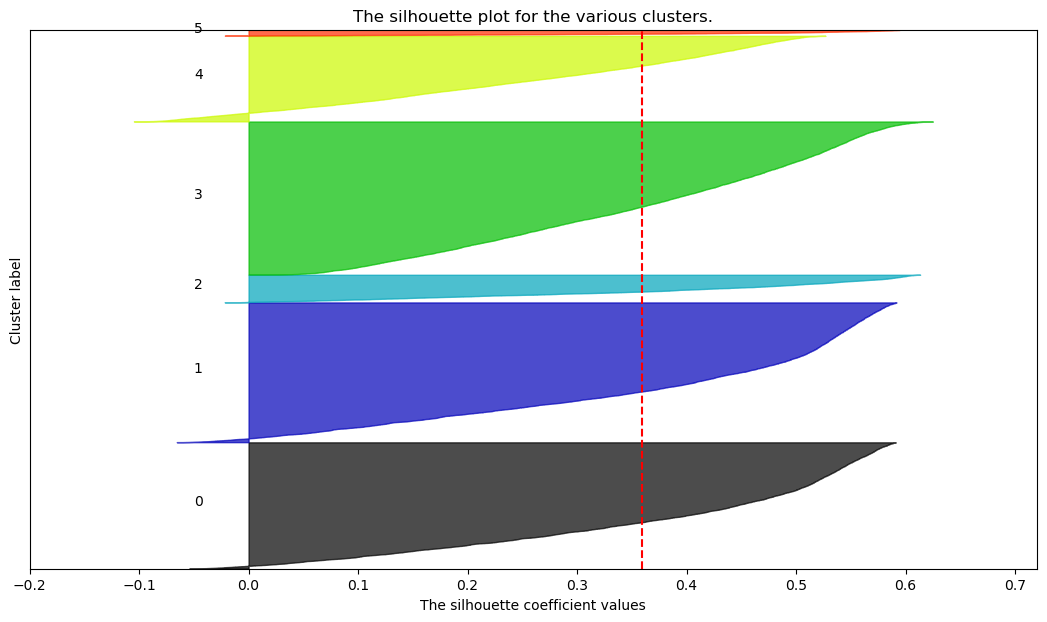

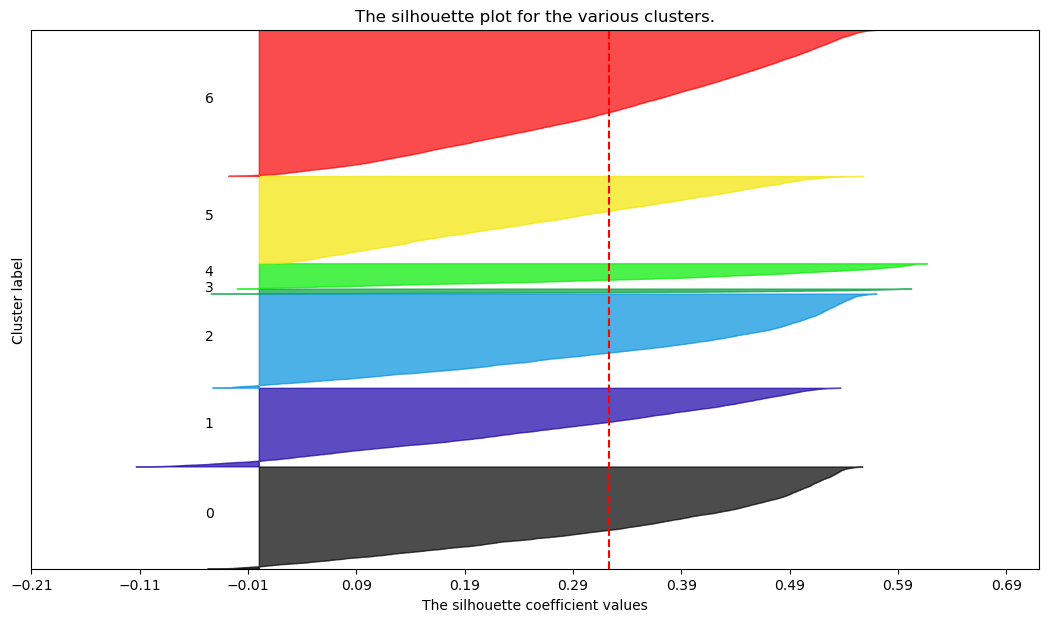

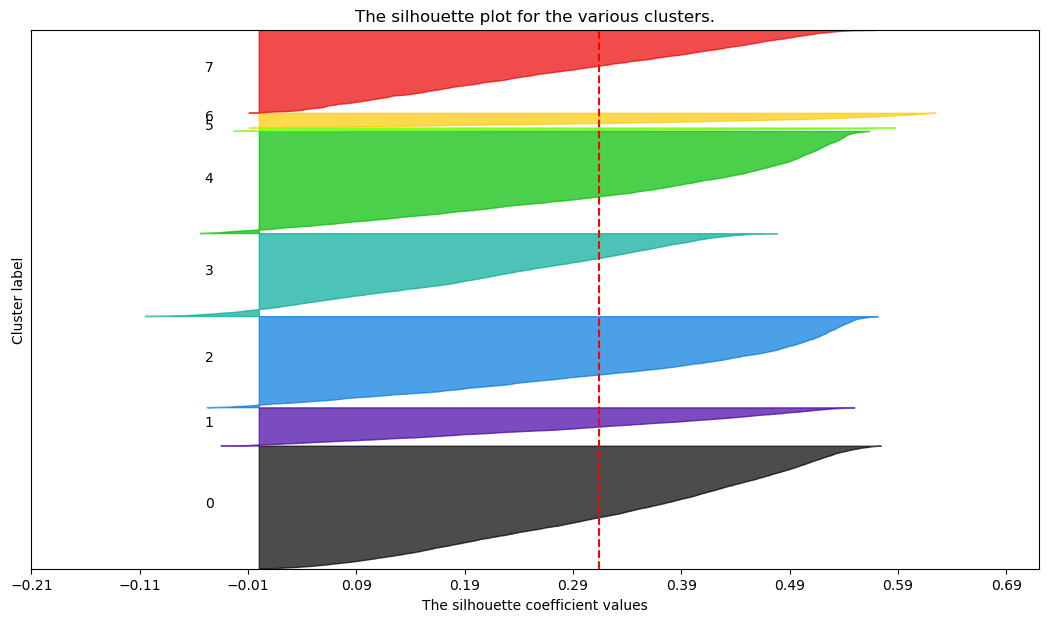

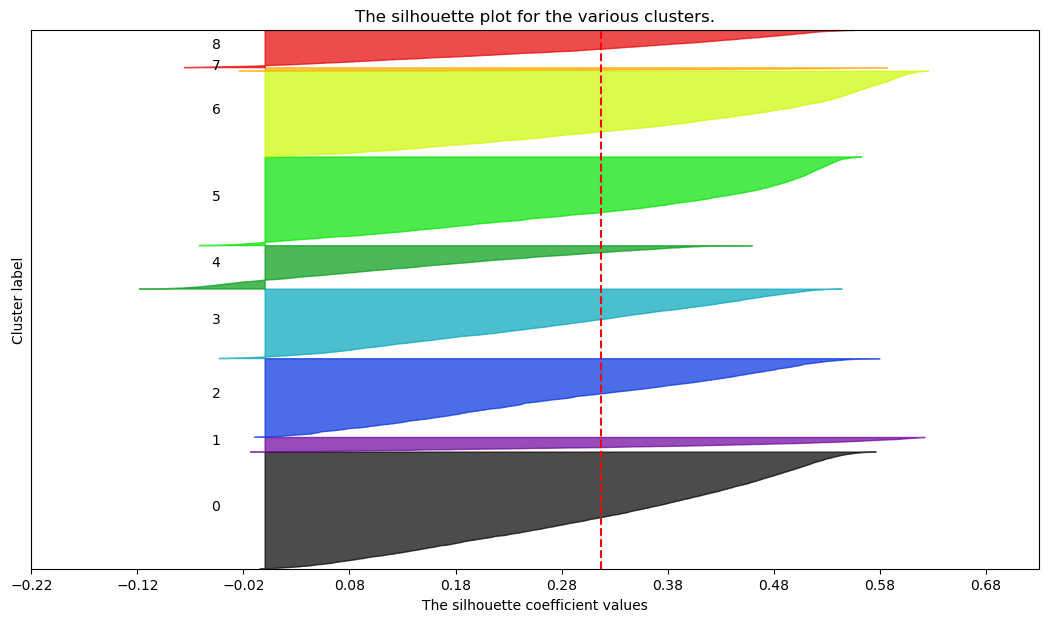

In [93]:
# storing average silhouette metric
avg_silhouette_beh = []
for nclus_beh in range_clusters_beh:
    # skip nclus == 1
    if nclus_beh == 1:
        continue

    fig = plt.figure(figsize=(13, 7))

    # initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility
    kmclust_beh = KMeans(n_clusters=nclus_beh, init='k-means++', n_init=15, random_state=1)
    cluster_labels_beh = kmclust_beh.fit_predict(df[behavioural_features])

    # silhouette_score gives the average value for all the samples
    # this gives a perspective into the density and separation of the formed clusters
    silhouette_avg_beh = silhouette_score(df[behavioural_features], cluster_labels_beh)
    avg_silhouette_beh.append(silhouette_avg_beh)
    print(f"For n_clusters = {nclus_beh}, the average silhouette_score is : {silhouette_avg_beh}")

    # compute the silhouette scores for each sample
    sample_silhouette_values_beh = silhouette_samples(df[behavioural_features], cluster_labels_beh)

    y_lower = 10
    for i in range(nclus_beh):
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values_beh = sample_silhouette_values_beh[cluster_labels_beh == i]
        ith_cluster_silhouette_values_beh.sort()
        
        # get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values_beh.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus_beh)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_beh,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # tompute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # the vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg_beh, color="red", linestyle="--")
    
    # the silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values_beh.min() -0.1, 2), np.round(sample_silhouette_values_beh.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # the (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[behavioural_features]) + (nclus_beh + 1) * 10])

    plt.yticks([])  # clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

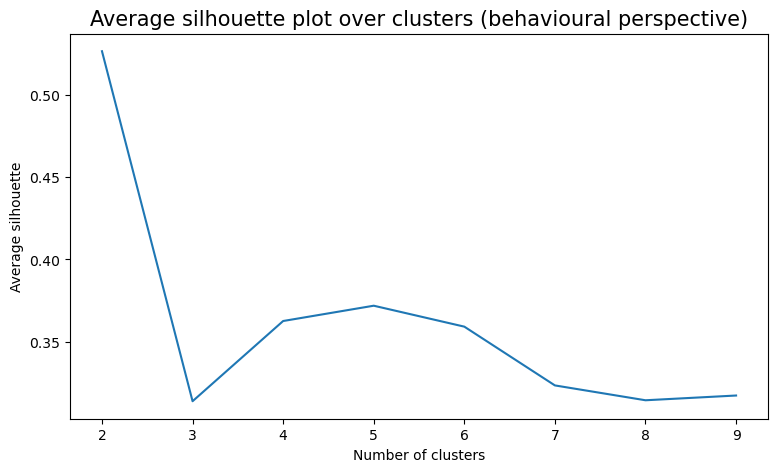

In [94]:
# average silhouette plot for the behavioural perspective
# inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters_beh[1:], # X-axis; 
         avg_silhouette_beh)     #  Y-axis

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters (behavioural perspective)", size=15)
plt.show()

- Based on the Silhouette plot for the behavioral perspective, the optimal number of clusters is 2, as this is where the average silhouette score is at its highest.

In [95]:
# final cluster solution of the behavioural perspective
number_clusters_beh = 2
kmclust_beh = KMeans(n_clusters=number_clusters_beh, init='k-means++', n_init=15, random_state=1)
km_labels_beh = kmclust_beh.fit_predict(df[behavioural_features])
km_labels_beh

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [96]:
# characterizing the final clusters of the behavioural perspective
df_concat = pd.concat((df[behavioural_features], pd.Series(km_labels_beh, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

first_order  days_since_last_order  order_frequency  total_orders  \
labels                                                                      
0         30.718507              61.682273         0.063049      3.258083   
1         12.058255              80.012278         0.146174     11.787879   

        total_amount_spent  average_spending  
labels                                        
0                25.371237          9.757218  
1               127.567247         14.218035

### Merging Perspectives